<a href="https://colab.research.google.com/github/sabitendu/Capstone_Project_On_Netflix_Movies_And_TV-Shows_Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
#import the necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline


### Dataset Loading

In [4]:
#import the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/Alma Better/Machine Learning/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [6]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [7]:
#tail of the data
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

In [9]:
print(f'The number of rows are {df.shape[0]} and the columns are {df.shape[1]}')

The number of rows are 7787 and the columns are 12


### Dataset Information

In [10]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## Only one column  is Numerical and others are Categorical

#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
duplicate_value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",duplicate_value)

The number of duplicate values in the data set is =  0


## There are no duplicate value in the dataset

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

* 2389 nulls in 'director'
* 718 in 'cast'
* 507 in 'country'
* 10 in 'date_added'
* 7 in rating

In [13]:
# Check for null values.
for col in df.columns:
  null_rate = df[col].isnull().sum() / len(df) * 100
  if null_rate > 0:
    print(f'Percentage of null values in {col} : {null_rate}%')

Percentage of null values in director : 30.679337357133683%
Percentage of null values in cast : 9.220495697958135%
Percentage of null values in country : 6.51085141903172%
Percentage of null values in date_added : 0.1284191601386927%
Percentage of null values in rating : 0.08989341209708489%


<Axes: >

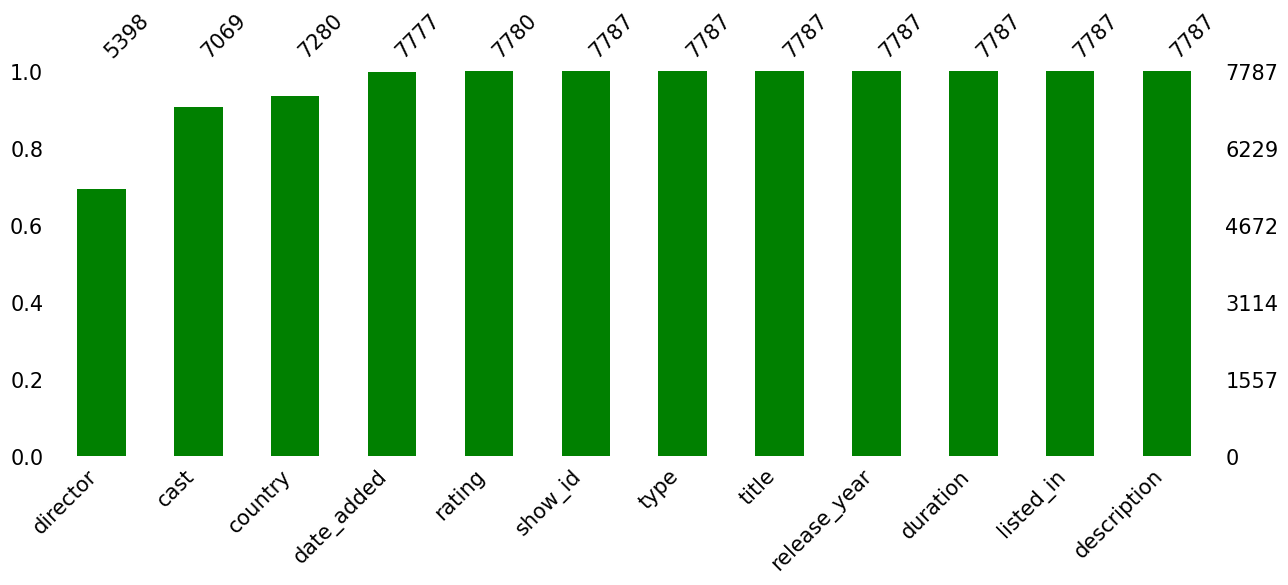

In [14]:
# Visualizing the missing values
msno.bar(df, color='green',sort='ascending', figsize=(15,5), fontsize=15)

### What did you know about your dataset?

The dataset provided is from the internet streaming sector; our objective is to analyse it, develop clustering methods, and create a content-based recommendation engine.

Clustering is a machine learning and data mining approach for grouping related data points together. A clustering algorithm is a strategy or approach for identifying clusters in a dataset. These clusters indicate natural data groupings, and the purpose of clustering is to uncover these groups without prior awareness of them.



* The dataset contains 7787 rows and 12 columns. There are missing values in the director, cast, nation, date_added, and rating columns. There are no duplicate values in the dataset.




* Every row of data we have pertains to a single film. As a result, we are unable to use any method to impute any null values. Furthermore, due to the short amount of the data, we do not want to lose any data, thus after analysing each column, we simply impute numeric values using an empty text in the following technique.



## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# **Statistical Summary**

In [16]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,7787.0,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0


### Variables Description

* **show_id** : Unique ID for every Movie/Show
* **type** : Identifier - Movie/Show
* **title** : Title of the Movie/Show
* **director** : Director of the Movie/Show
* **cast** : Actors involved in the Movie/Show
* **country** : Country where the Movie/Show was produced
* **date_added** : Date it was added on Netflix
* **release_year** : Actual Release year of the Movie/Show
* **rating** : TV Rating of the Movie/Show
* **duration** : Total Duration - in minutes or number of seasons
* **listed_in** : Genre
* **description** : The Summary description

### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())


No. of unique values in show_id is 7787
No. of unique values in type is 2
No. of unique values in title is 7787
No. of unique values in director is 4049
No. of unique values in cast is 6831
No. of unique values in country is 681
No. of unique values in date_added is 1565
No. of unique values in release_year is 73
No. of unique values in rating is 14
No. of unique values in duration is 216
No. of unique values in listed_in is 492
No. of unique values in description is 7769


## 3. ***Data Wrangling***

###3.1 Drop the null values of date_added and rating column

In [18]:
# Remove null values in date_added.
df.dropna(subset=['date_added'], inplace=True)
# Remove null values in rating.
df.dropna(subset=['rating'], inplace=True)

Others missing data will be treated in upcoming steps.

### 3.2 Extract the month year from the dated_added column

In [19]:
# Convert 'date_added' column to datetime
df['date_added'] = pd.to_datetime(df['date_added'])
# Extract month and year from 'date_added'
df['added_year'] = df['date_added'].dt.year
df['added_month'] = df['date_added'].dt.month

In [20]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,10
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,2020,3


### What all manipulations have you done and insights you found?

* Dropped the null values of date_added and rating column as they are very low percentage
* Convert the dated_added column into date-time format
* Extract the month and year from the dated_added column

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Distribution of Movies and TV-Shows**

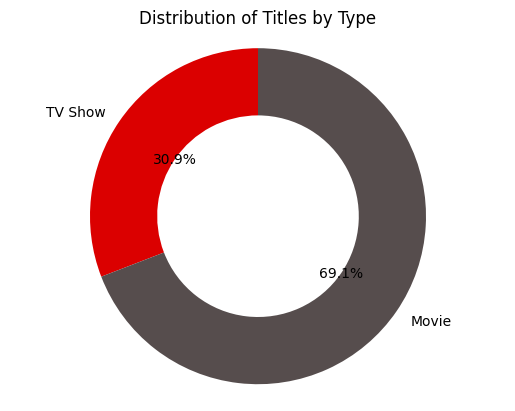

In [21]:
# Data
types = df['type']
colors = ['#db0000', '#564d4d']
labels = ['TV Show', 'Movie']
tv_show_count = df['type'].value_counts()['TV Show']
movie_count = df['type'].value_counts()['Movie']

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(x=[tv_show_count, movie_count], labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4),colors=colors)

# Draw a circle to make it a donut chart
circle = plt.Circle((0, 0), 0.3, color='white')
ax.add_artist(circle)

# Set aspect ratio to equal to ensure the pie is drawn as a circle
ax.axis('equal')

# Title
plt.title('Distribution of Titles by Type')

# Display the chart
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* Around 31 percent of total content are tv shows
*Around 69 percent of total content are movies

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Any new movie will face more competetion  over any new tv series

#### Distribution of Content added over the years

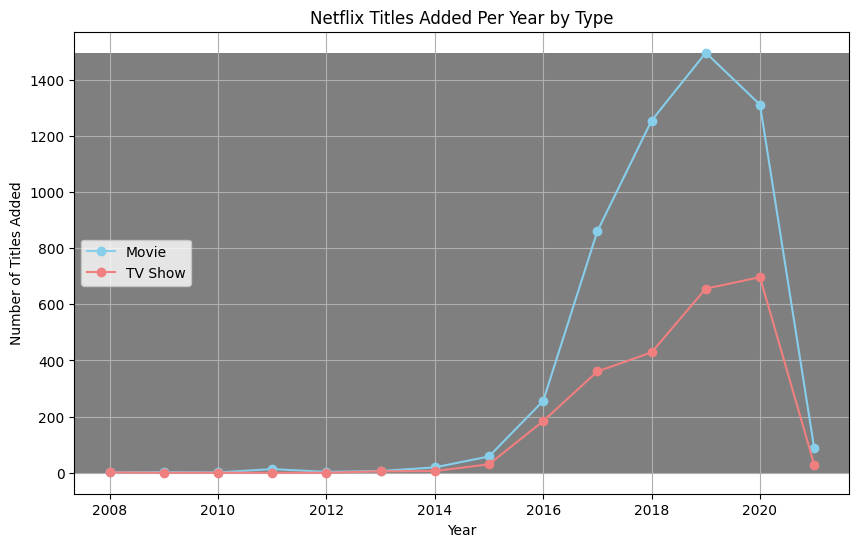

In [22]:
# Chart - 2 visualization code
# Group the data by 'added_year' and 'type' and count the number of titles added each year for each type
yearly_type_counts = df.groupby(['added_year', 'type']).size().unstack(fill_value=0)
# Create a line chart with a background color
plt.figure(figsize=(10, 6))
colors = ['skyblue', 'lightcoral']  # Colors for Movie and TV Show lines
for column, color in zip(yearly_type_counts.columns, colors):
    plt.plot(yearly_type_counts.index, yearly_type_counts[column], marker='o', label=column, color=color)
# Add background color
plt.axhspan(0, max(yearly_type_counts.max()), facecolor='black', alpha=0.5)
# Add legend, labels, and title
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.title('Netflix Titles Added Per Year by Type')

plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* Highest Movies added in 2019
* Highest TV-Shows added in 2020


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* 2019 and 2020 has best years of buisness for Netflix.
* From 2015 buisness has start to grow for Netflix.

#### Distribution of Content added over the months

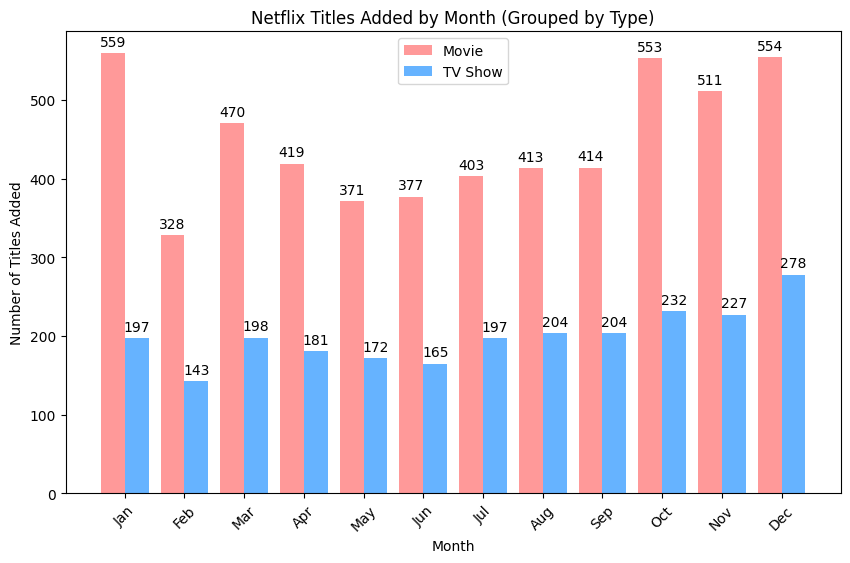

In [23]:
# Chart - 3 visualization code
# Group the data by 'added_month' and 'type' and count the number of titles added each month for each type
monthly_type_counts = df.groupby(['added_month', 'type']).size().unstack(fill_value=0)

# Define month names for labeling the x-axis
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Define custom colors for the bars
colors = ['#ff9999', '#66b3ff']  # Different colors for "Movie" and "TV Show"

# Create a grouped bar chart with counts above the bars
plt.figure(figsize=(10, 6))
bar_width = 0.4  # Width of each bar
index = np.arange(len(month_names))  # X-axis positions for bars

# Create bars for "Movie" and "TV Show" side by side
movie_bars = plt.bar(index - bar_width/2, monthly_type_counts['Movie'], bar_width, label='Movie', color=colors[0])
tv_show_bars = plt.bar(index + bar_width/2, monthly_type_counts['TV Show'], bar_width, label='TV Show', color=colors[1])

# Add count labels above the bars
for bar in movie_bars + tv_show_bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom', fontsize=10)

# Add legend, labels, and title
plt.legend()
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.title('Netflix Titles Added by Month (Grouped by Type)')
plt.xticks(index, month_names)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* Most movie added in january,october and december
* Most TV-Show added in december

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Netflix has most number of release in january,october and december and least number of release in february

#### Chart - 4

*Each TV show and movie on Netflix is assigned a maturity rating to help members make informed choices for themselves and their children.Netflix determines maturity ratings by the frequency and impact of mature content in a TV show or movie. TV show ratings reflect the overall maturity level of the whole series.*


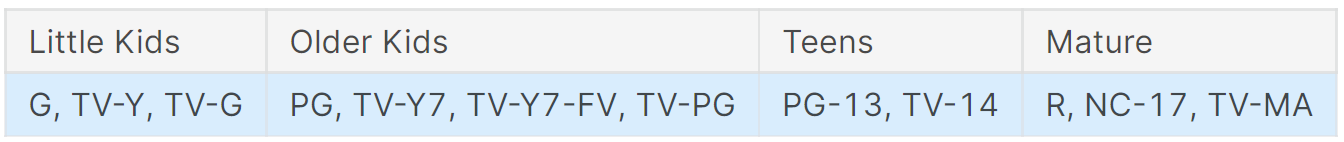


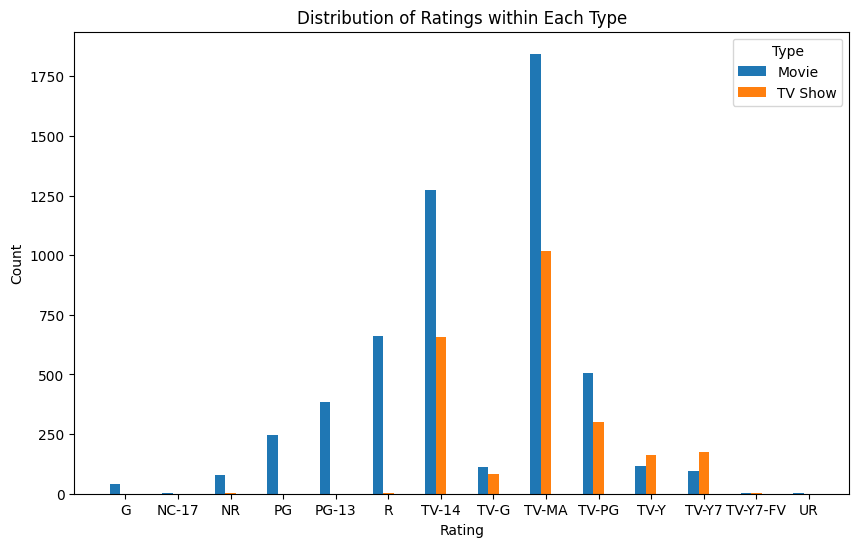

In [24]:
# Chart - 4 visualization code
# Group the data by 'type' and 'rating' and count the number of titles in each combination
rating_counts = df.groupby(['type', 'rating']).size().unstack(fill_value=0)

# Define custom colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Define the rating categories and types
rating_categories = rating_counts.columns
types = rating_counts.index

# Create a grouped bar chart for each type
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(rating_categories))

for i, content_type in enumerate(types):
    plt.bar(
        index + i * bar_width,
        rating_counts.loc[content_type],
        bar_width,
        label=f'{content_type}',
        color=colors[i],
    )

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings within Each Type')
plt.xticks(index + bar_width, rating_categories)
plt.legend(title='Type', loc='upper right')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* TV-MA tops the charts, indicating that mature content is more popular on Netflix.
* This popularity is followed by TV-14 and TV-PG, which are Shows focused on Teens and Older kids.
* Very few titles with a rating NC-17 exist. It can be understood since this type of content is purely for the audience above 17.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Most competitive ratings are TV-14 and TV-MA and least competitive ratings are NC-17 and UR.

#### Chart - 5

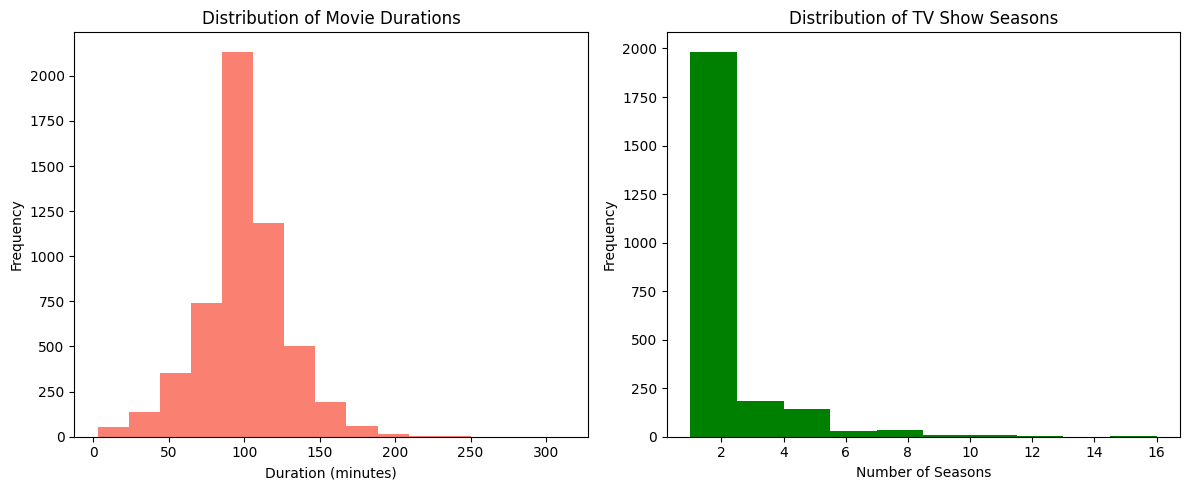

In [25]:
# Chart - 5 visualization code
# Extract numeric duration values
df['duration_value'] = df['duration'].str.extract('(\d+)').astype(float)

# Create subplots for movies and TV shows
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Distribution of Movie Durations
ax1.hist(df[df['type'] == 'Movie']['duration_value'], bins=15, color='salmon')
ax1.set_xlabel('Duration (minutes)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Movie Durations')

# Subplot 2: Distribution of TV Show Durations
ax2.hist(df[df['type'] == 'TV Show']['duration_value'], bins=10, color='green')
ax2.set_xlabel('Number of Seasons')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of TV Show Seasons')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* Most of the movies duration is between 80 min and 120 min
* Very few movies duration is greater than 180 min.
* Most of the TV-Shows have 2 seasons.
* Very few TV-Shows have greater than 8 seasons   

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Country wise Content Distribution

In [26]:
#install geopandas to plot
!pip install geopandas pandas matplotlib


In [27]:
# Split and count the number of content items per country
country_counts = df['country'].str.split(', ').explode().value_counts().reset_index()
country_counts.columns = ['country', 'count']
country_counts

,country,count
0,United States,3287
1,India,990
2,United Kingdom,721
3,Canada,412
4,France,349
...,...,...
116,Dominican Republic,1
117,Samoa,1
118,Azerbaijan,1
119,Bermuda,1


In [28]:
!pip install pycountry


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 52.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681833 sha256=c7e4ab61353af7470395c127adcb4704f05546315c18428ba1d731f7b4a0db4e
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [29]:
import pycountry
# Function to get ISO alpha-3 code from country name using pycountry
def get_iso_alpha(country_name):
    try:
        country = pycountry.countries.search_fuzzy(country_name)[0]
        return country.alpha_3
    except LookupError:
        return None

# Create the ISO alpha-3 column using the function
country_counts['iso_alpha'] = country_counts['country'].apply(get_iso_alpha)

# Filter out rows where ISO alpha-3 is None (for countries not found)
country_count_iso_df = country_counts.dropna(subset=['iso_alpha'])





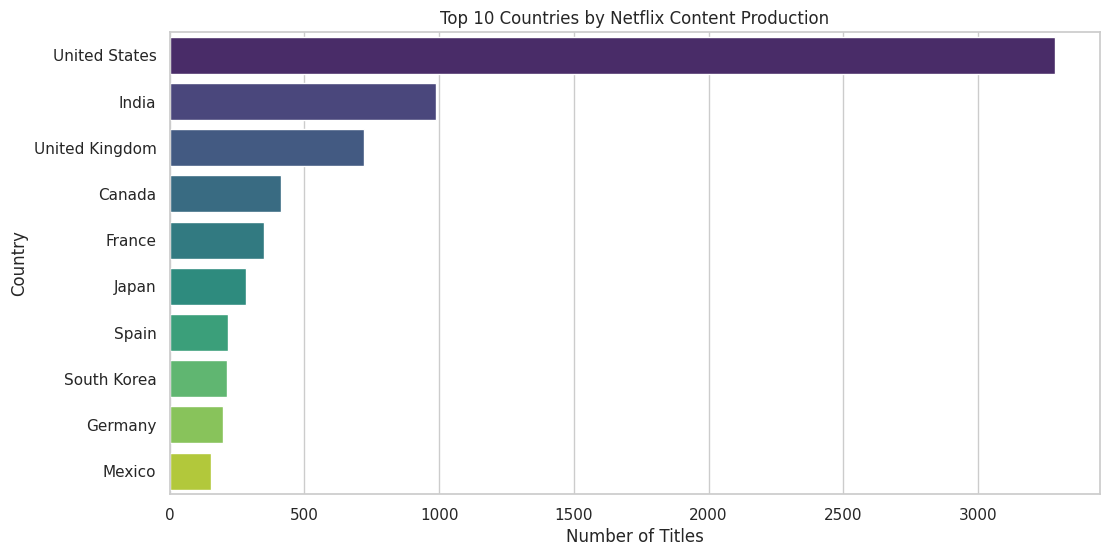

In [30]:
# Sort the DataFrame by content count in descending order and select the top 10 countries
top_10_countries = country_count_iso_df.sort_values(by='count', ascending=False).head(10)

# Create a countplot using seaborn
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.barplot(x='count', y='country', data=top_10_countries, palette='viridis')

# Set plot title and labels
plt.title('Top 10 Countries by Netflix Content Production')
plt.xlabel('Number of Titles')
plt.ylabel('Country')

# Show the countplot
plt.show()

In [31]:
#necessary imports for plotly and map
import plotly.express as px
# Create the choropleth map using Plotly Express
fig = px.choropleth(
    country_count_iso_df,
    locations='iso_alpha',
    color='count',  # Provide the values to be mapped (count of Netflix content)
    hover_name='country',  # Column to add to hover information
    color_continuous_scale='sunset',
    title='Netflix Content Production by Country',
)

# Show the choropleth map
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* USA has the most number of content produce in this ott platform and follwed by India and UK.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

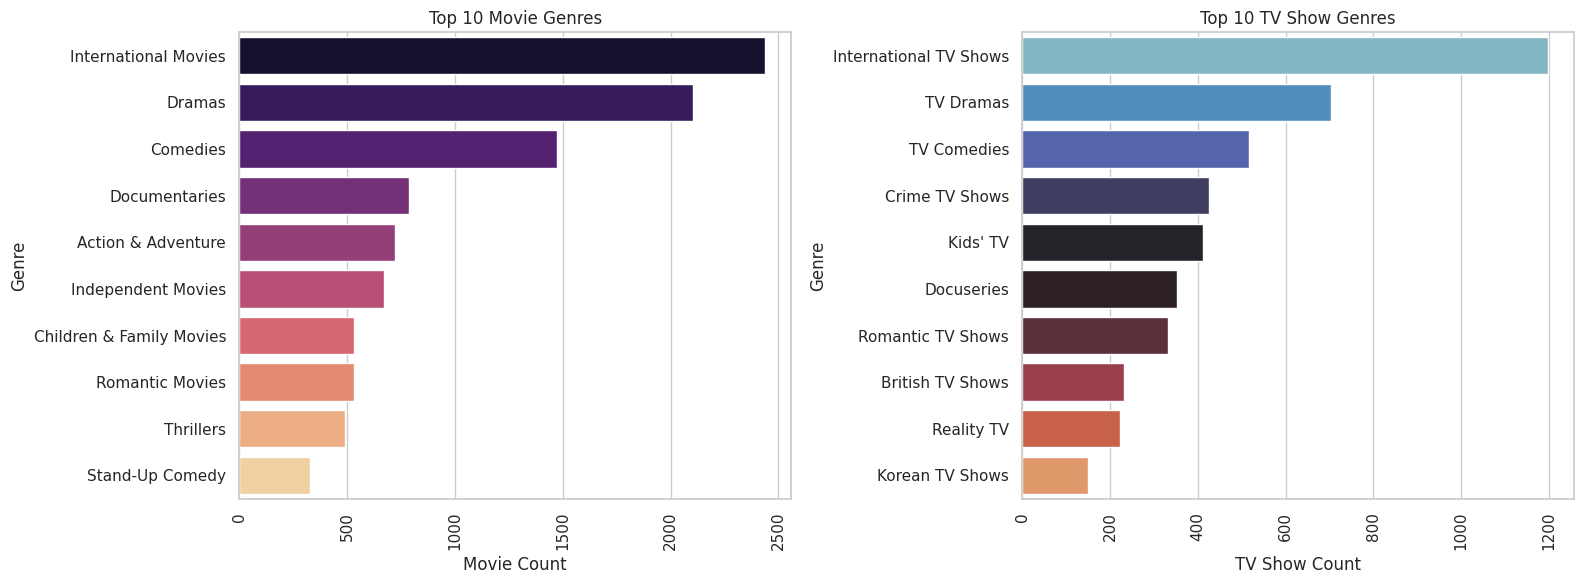

In [32]:
# Chart - 7 visualization code
# Split the 'listed_in' column into a list of genres
df['genres'] = df['listed_in'].str.split(', ')

# Explode the DataFrame to have one row per genre
df_exploded = df.explode('genres')
# Create separate DataFrames for movies and TV shows
movies_df = df_exploded[df_exploded['type'] == 'Movie']
tv_shows_df = df_exploded[df_exploded['type'] == 'TV Show']

# Calculate genre counts for movies and TV shows
movie_genre_counts = movies_df['genres'].value_counts().reset_index()
movie_genre_counts.columns = ['Genre', 'Movie Count']

tv_show_genre_counts = tv_shows_df['genres'].value_counts().reset_index()
tv_show_genre_counts.columns = ['Genre', 'TV Show Count']

# Create bar plots for movies and TV shows
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.set_theme(style="whitegrid")

# Plot for movies
sns.barplot(x='Movie Count', y='Genre', data=movie_genre_counts.head(10), palette='magma', ax=axes[0])
axes[0].set_title('Top 10 Movie Genres')
axes[0].set_xlabel('Movie Count')
axes[0].set_ylabel('Genre')

# Plot for TV shows
sns.barplot(x='TV Show Count', y='Genre', data=tv_show_genre_counts.head(10), palette='icefire', ax=axes[1])
axes[1].set_title('Top 10 TV Show Genres')
axes[1].set_xlabel('TV Show Count')
axes[1].set_ylabel('Genre')

# Rotate x-axis labels for better readability
axes[0].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='x', rotation=90)

# Show the plots
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* Top leading movie genere are international movies followed by dramas,comedies and documentaries.
* Top leading tv-show generes are international tv-shows followed by dramas,comedy and crime.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Comedy and drama genre are the safest genre for buisness to invest.

#### Chart - 8

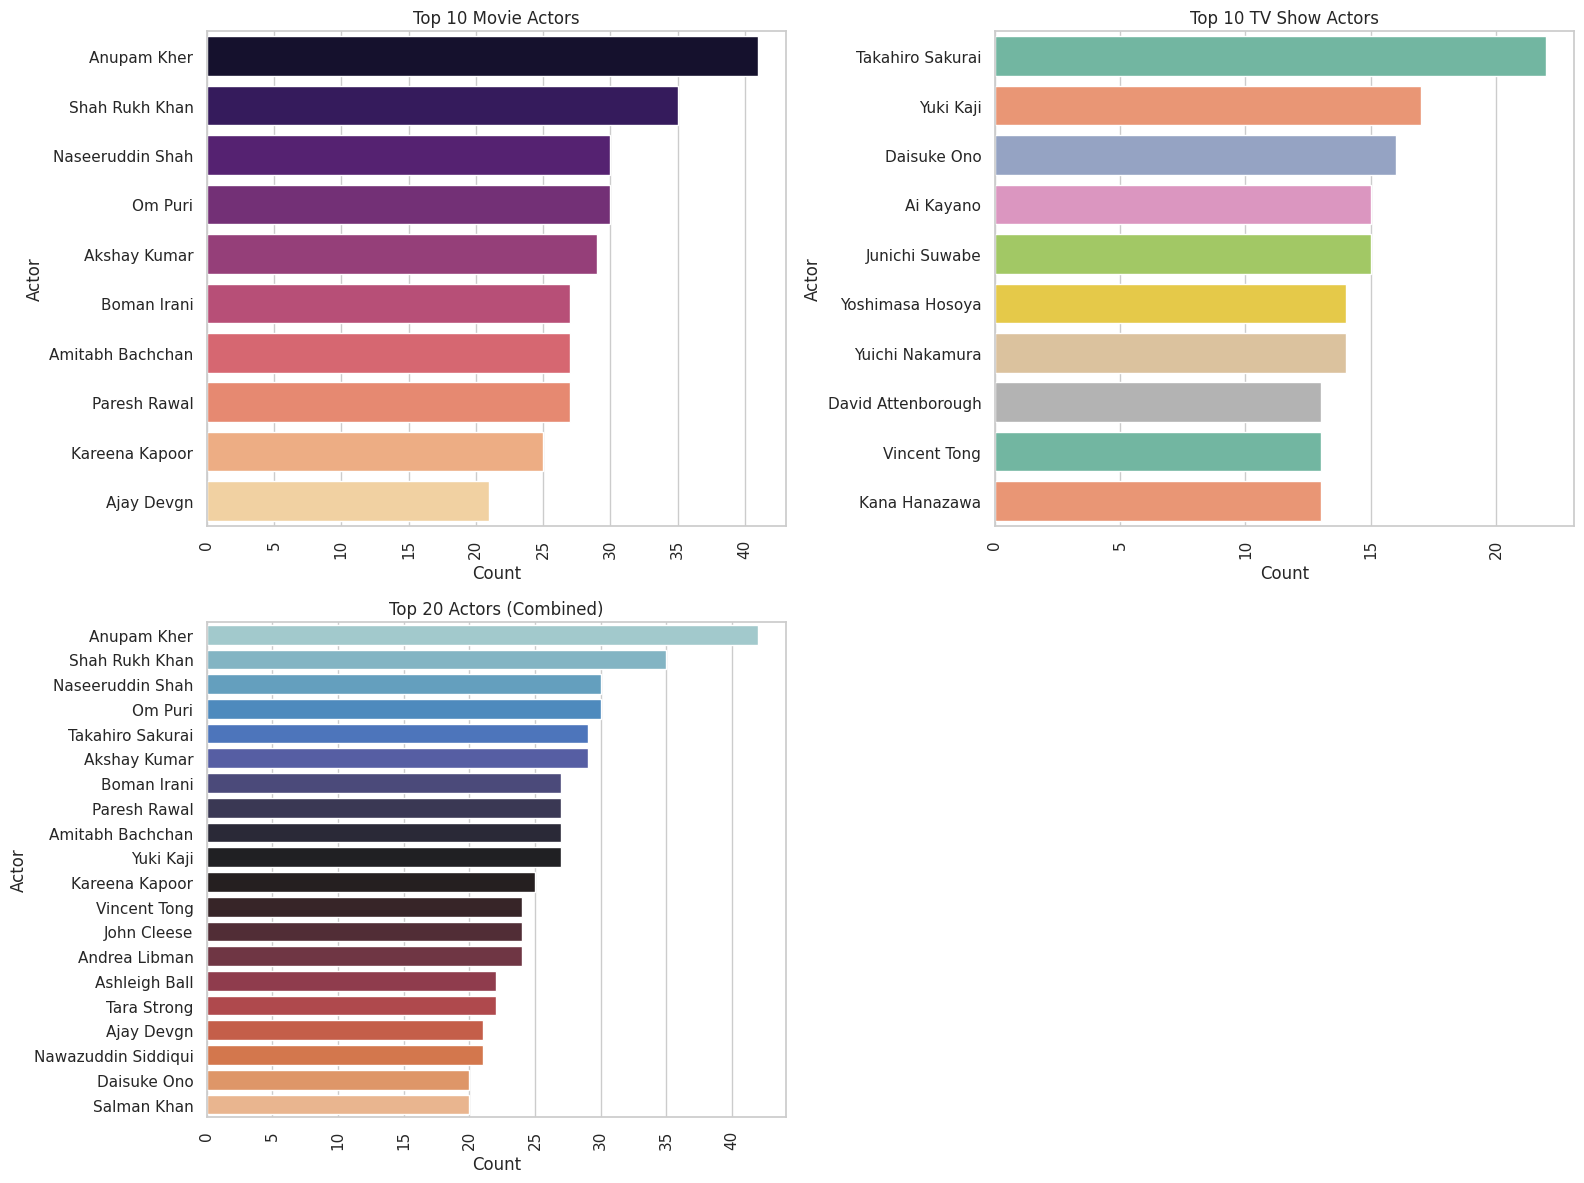

In [33]:
# Chart - 8 visualization code
# Split the 'cast' column into a list of actors
df['cast'] = df['cast'].str.split(', ')

# Flatten the list of actors and count their occurrences
actors_series = df['cast'].explode()
top_actors = actors_series.value_counts().head(20)

# Create a DataFrame for the top actors
top_actors_df = pd.DataFrame({'Actor': top_actors.index, 'Count': top_actors.values})

# Separate the data for movies and TV shows
movies_df = df[df['type'] == 'Movie']
tv_shows_df = df[df['type'] == 'TV Show']

# Calculate top 10 actors for movies and TV shows
top_actors_movies = movies_df['cast'].explode().value_counts().head(10)
top_actors_tv_shows = tv_shows_df['cast'].explode().value_counts().head(10)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.set_theme(style="whitegrid")

# Plot top 10 movie actors
sns.barplot(x=top_actors_movies.values, y=top_actors_movies.index, ax=axes[0, 0], palette='magma')
axes[0, 0].set_title('Top 10 Movie Actors')
axes[0, 0].set_xlabel('Count')
axes[0, 0].set_ylabel('Actor')
axes[0, 0].tick_params(axis='x', rotation=90)

# Plot top 10 TV show actors
sns.barplot(x=top_actors_tv_shows.values, y=top_actors_tv_shows.index, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Top 10 TV Show Actors')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('Actor')
axes[0, 1].tick_params(axis='x', rotation=90)

# Plot top 20 actors (combined)
sns.barplot(x=top_actors_df['Count'], y=top_actors_df['Actor'], ax=axes[1, 0], palette='icefire')
axes[1, 0].set_title('Top 20 Actors (Combined)')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Actor')
axes[1, 0].tick_params(axis='x', rotation=90)

# Remove empty subplot
fig.delaxes(axes[1, 1])

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

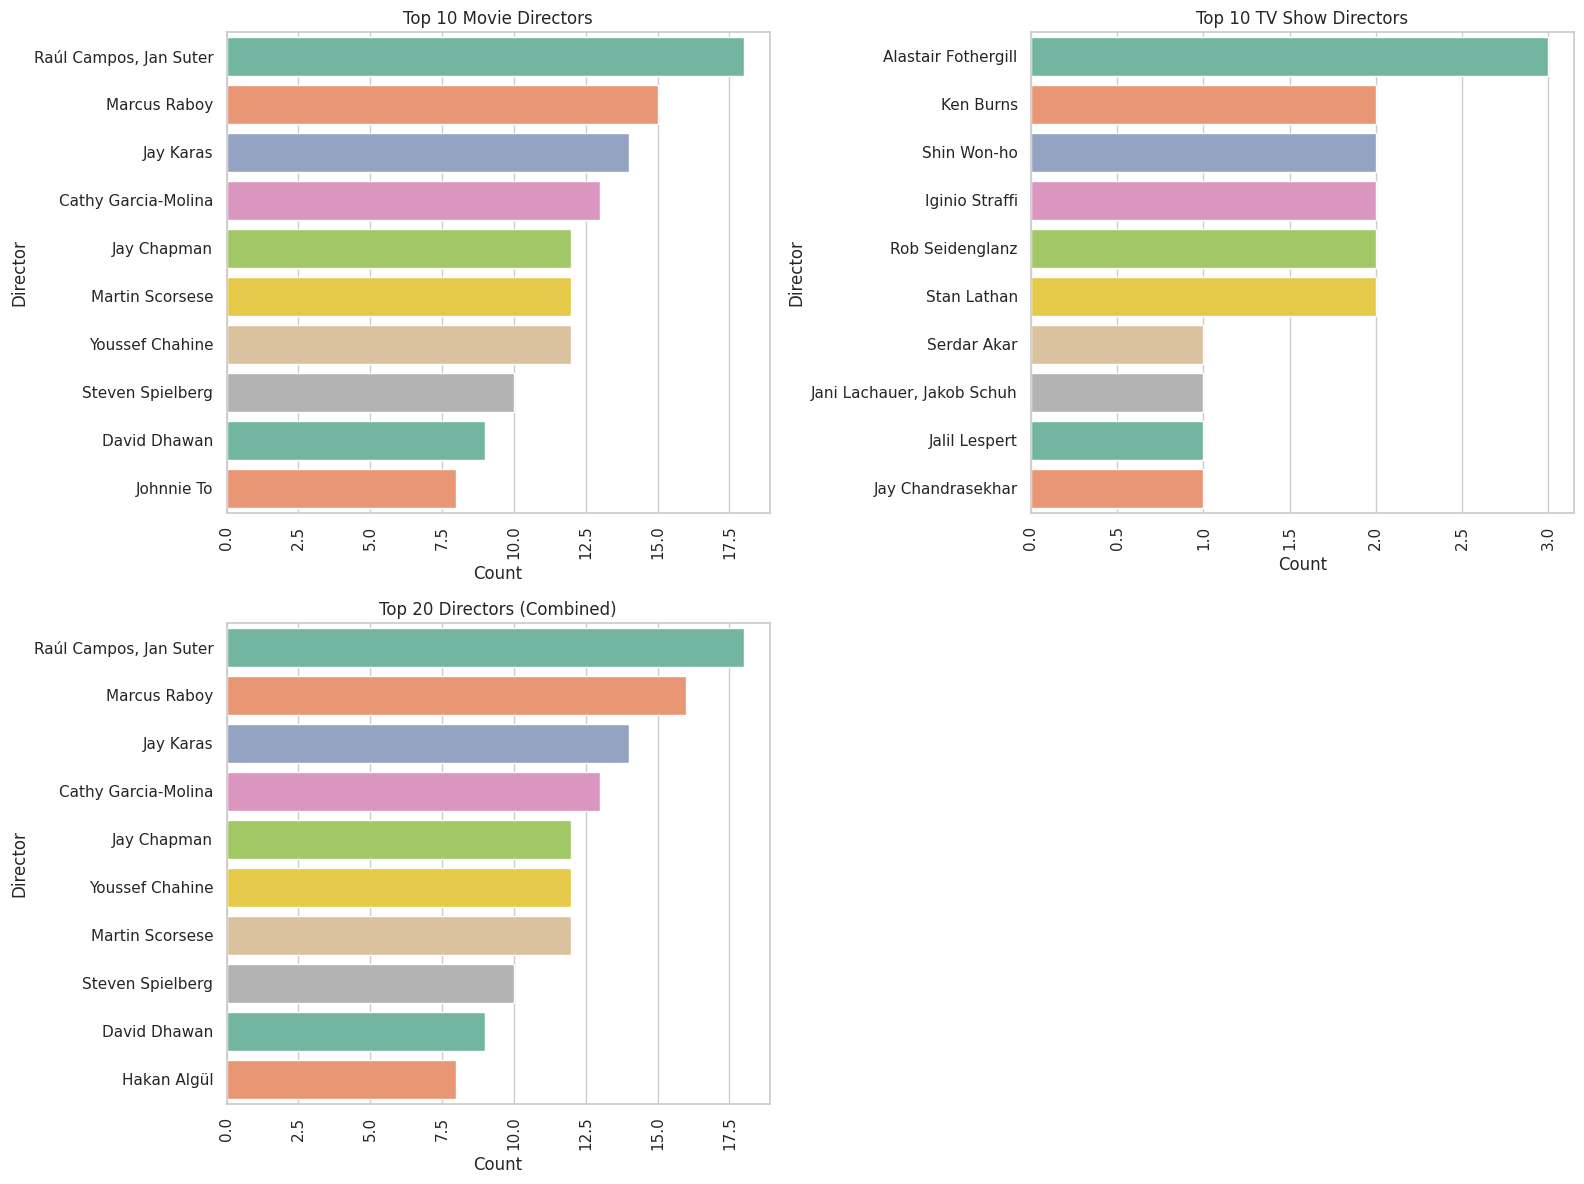

In [34]:
# Chart - 9 visualization code
# Separate the data for movies and TV shows
movies_df =df[df['type'] == 'Movie']
tv_shows_df = df[df['type'] == 'TV Show']

# Calculate top 10 directors for movies and TV shows
top_directors_movies = movies_df['director'].value_counts().head(10)
top_directors_tv_shows = tv_shows_df['director'].value_counts().head(10)

# Combine the top directors from both movies and TV shows
top_directors_combined = df['director'].value_counts().head(10)


# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.set_theme(style="whitegrid")

# Plot top 10 movie directors
sns.barplot(x=top_directors_movies.values, y=top_directors_movies.index, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Top 10 Movie Directors')
axes[0, 0].set_xlabel('Count')
axes[0, 0].set_ylabel('Director')
axes[0, 0].tick_params(axis='x', rotation=90)

# Plot top 10 TV show directors
sns.barplot(x=top_directors_tv_shows.values, y=top_directors_tv_shows.index, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Top 10 TV Show Directors')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('Director')
axes[0, 1].tick_params(axis='x', rotation=90)

# Plot top 20 directors (combined)
sns.barplot(x=top_directors_combined.values, y=top_directors_combined.index, ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Top 20 Directors (Combined)')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Director')
axes[1, 0].tick_params(axis='x', rotation=90)

# Remove empty subplot
fig.delaxes(axes[1, 1])

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

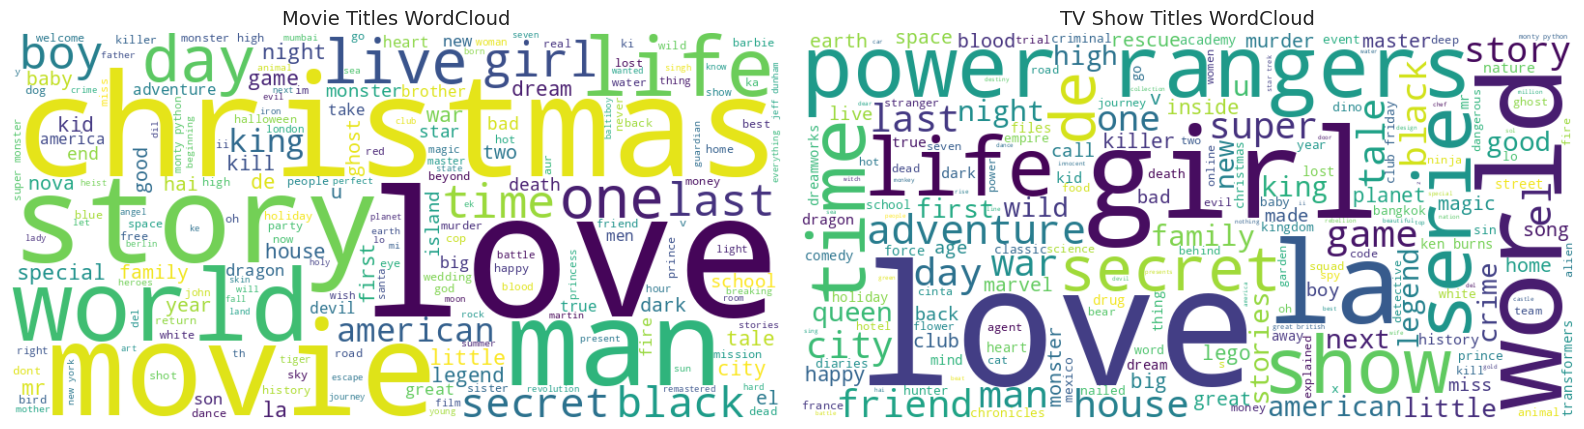

In [35]:
# Chart - 10 visualization code
import re
from wordcloud import WordCloud
# Function to clean text data
def clean_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-alphabetic characters
    return text.lower()

# Clean and concatenate titles for movies and TV shows
movie_titles = ' '.join(movies_df['title'].apply(clean_text))
tv_show_titles = ' '.join(tv_shows_df['title'].apply(clean_text))

# Create WordCloud objects
movie_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(movie_titles)
tv_show_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tv_show_titles)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot movie titles WordCloud
axes[0].imshow(movie_wordcloud, interpolation='bilinear')
axes[0].set_title('Movie Titles WordCloud', fontsize=14)
axes[0].axis('off')

# Plot TV show titles WordCloud
axes[1].imshow(tv_show_wordcloud, interpolation='bilinear')
axes[1].set_title('TV Show Titles WordCloud', fontsize=14)
axes[1].axis('off')

# Adjust subplot spacing
plt.tight_layout()

# Show the subplots
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Top 10 Genre of content in Top 10 content produced Countries

In [36]:

from collections import Counter
import plotly.express as px

# List of countries to analyze
countries = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia']

# Create a function to count genre occurrences
def count_genres(data):
    genre_counts = Counter()
    for genres in data['listed_in']:
        for genre in genres.split(', '):
            genre_counts[genre] += 1
    return dict(genre_counts)

# Create an empty dictionary to store top 10 genres for each country
top_10_genres_by_country = {}

# Iterate through the list of countries
for country in countries:
    # Filter data for the current country
    country_data = df[df['country'] == country]

    # Count genre occurrences for the country
    genre_counts = count_genres(country_data)

    # Get the top 10 genres for the country
    top_10_genres = dict(sorted(genre_counts.items(), key=lambda item: item[1], reverse=True)[:10])

    # Store the top 10 genres in the dictionary
    top_10_genres_by_country[country] = top_10_genres

# Plot radial column charts for each country's top 10 genres
for country, top_genres in top_10_genres_by_country.items():
    genre_data = pd.DataFrame(list(top_genres.items()), columns=['Genre', 'Count'])
    fig = px.bar_polar(genre_data, r='Count', theta='Genre',
                       title=f'Top 10 Genres in {country}',
                       labels={'Genre': 'Top Genres', 'Count': 'Count'})
    fig.update_traces(marker_color='lightcoral')
    fig.update_layout(polar=dict(radialaxis=dict(showticklabels=False, ticks='')))
    fig.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Popular Director in Each Genre

In [37]:
# Create an empty dictionary to store genre-director mappings
genre_directors = {}

# Iterate through each genre
for _, row in df.iterrows():
    genre_list = row['genres']
    director = row['director']

    # Skip entries with NaN directors
    if pd.notna(director):
        for genre in genre_list:
            # Initialize the genre entry if it doesn't exist
            if genre not in genre_directors:
                genre_directors[genre] = {}

            # Initialize the director entry for the genre if it doesn't exist
            if director not in genre_directors[genre]:
                genre_directors[genre][director] = 0

            # Increment the director's count for the genre
            genre_directors[genre][director] += 1

# Create a DataFrame from the genre-director dictionary
result_df = pd.DataFrame([(genre, director, count) for genre, directors in genre_directors.items() for director, count in directors.items()],
                         columns=['Genre', 'Director', 'Content Count'])

# Sort the DataFrame by genre and content count
result_df.sort_values(['Genre', 'Content Count'], ascending=[True, False], inplace=True)

# Reset the index of the final DataFrame
result_df.reset_index(drop=True, inplace=True)


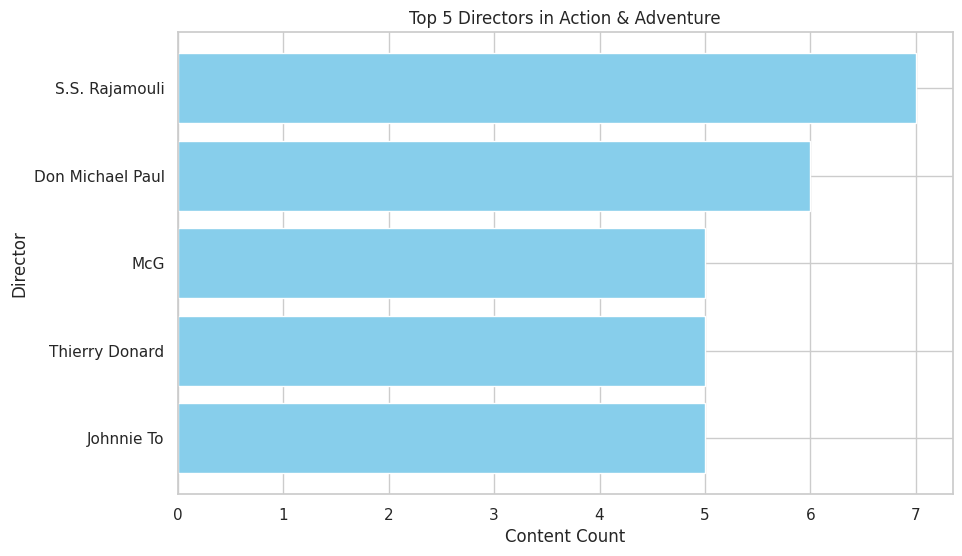

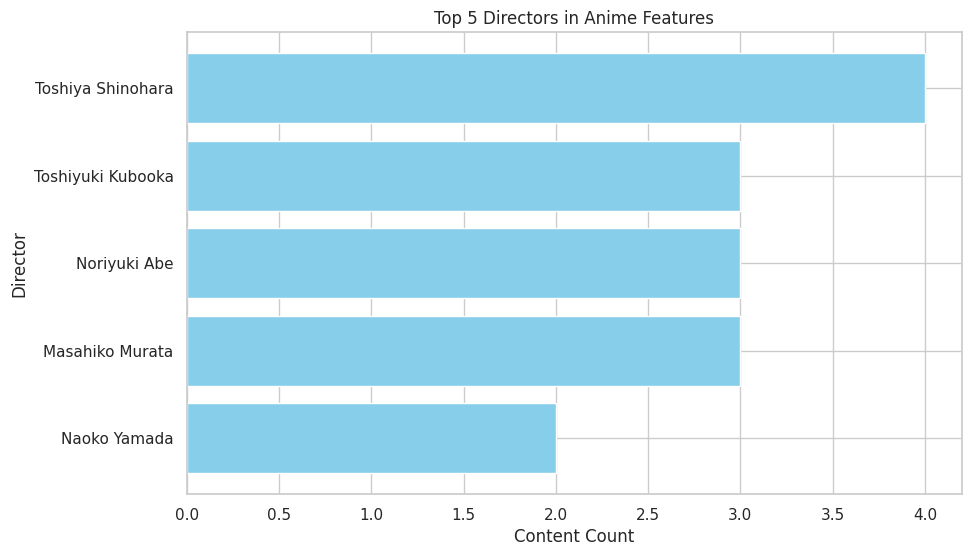

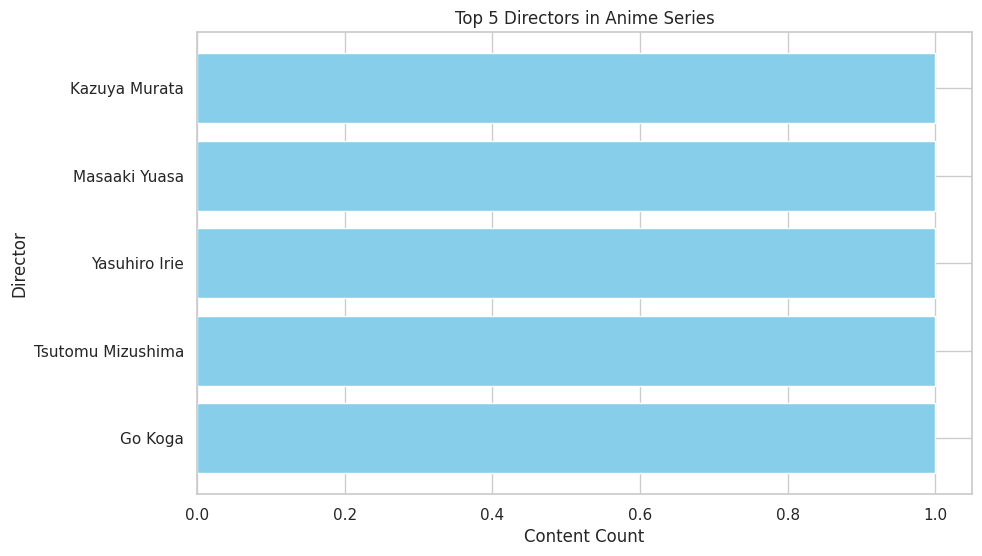

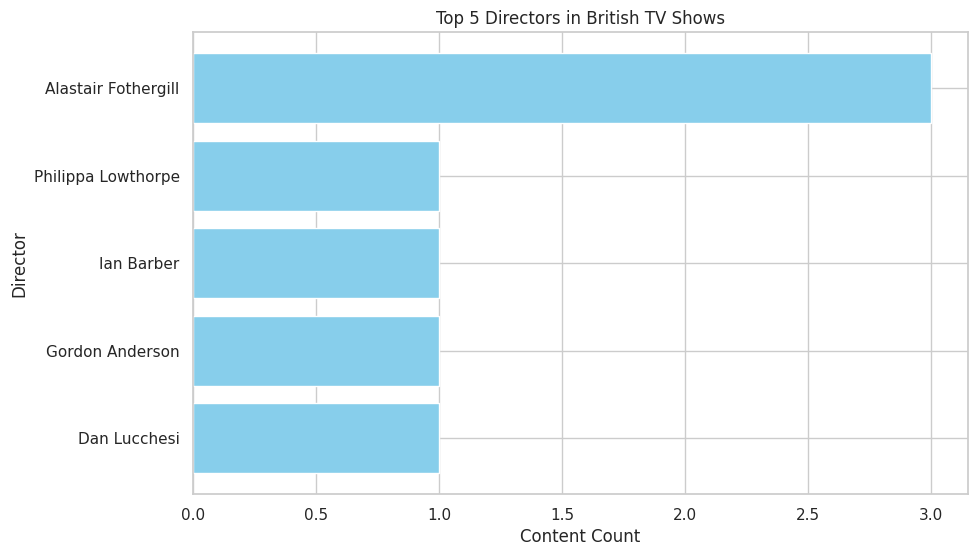

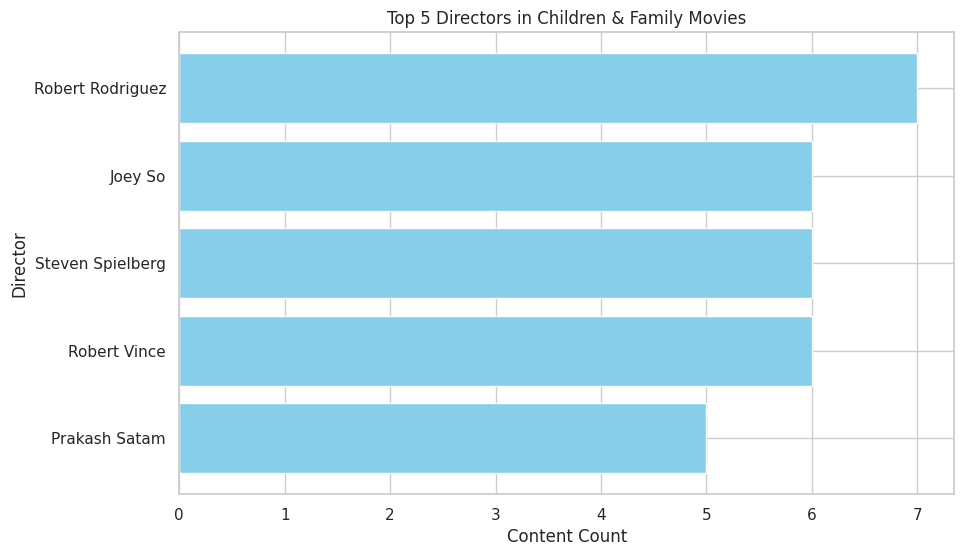

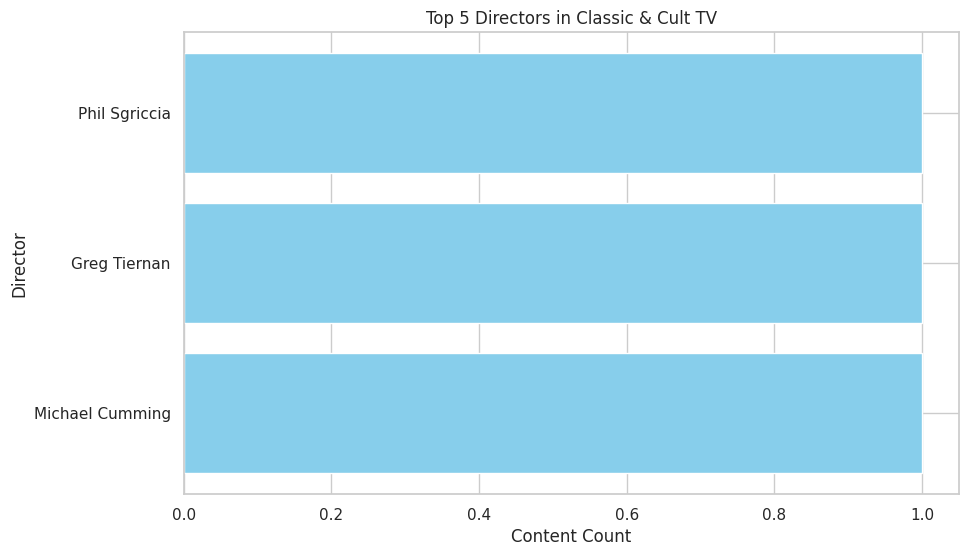

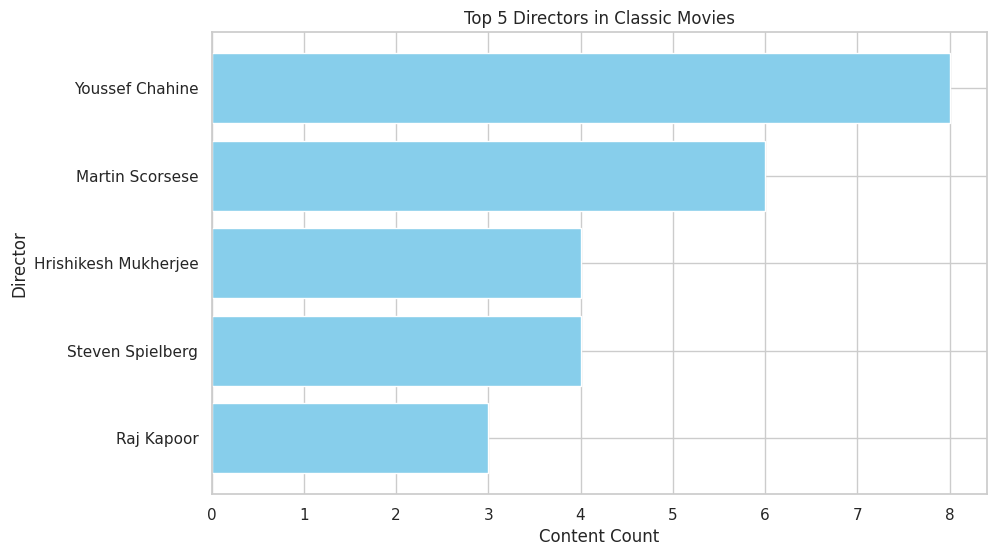

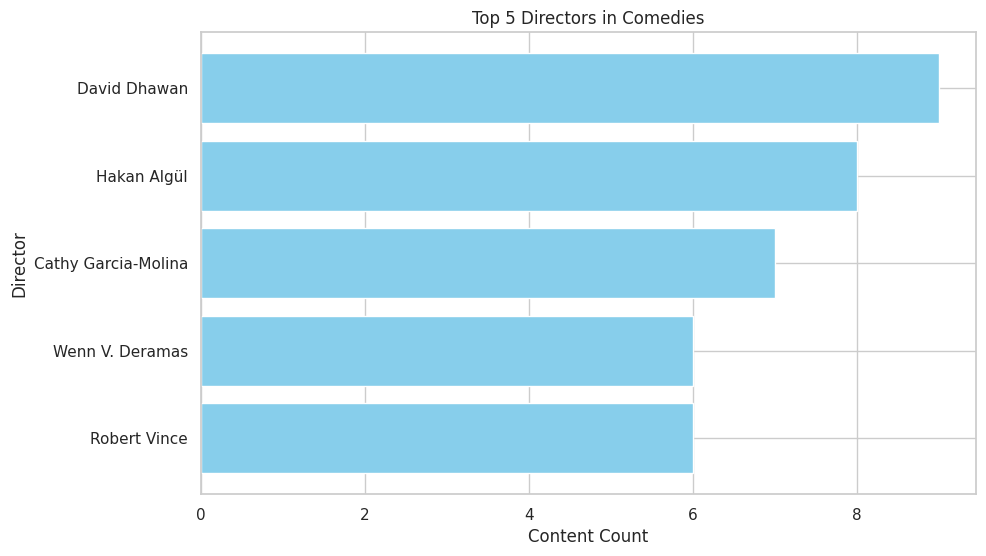

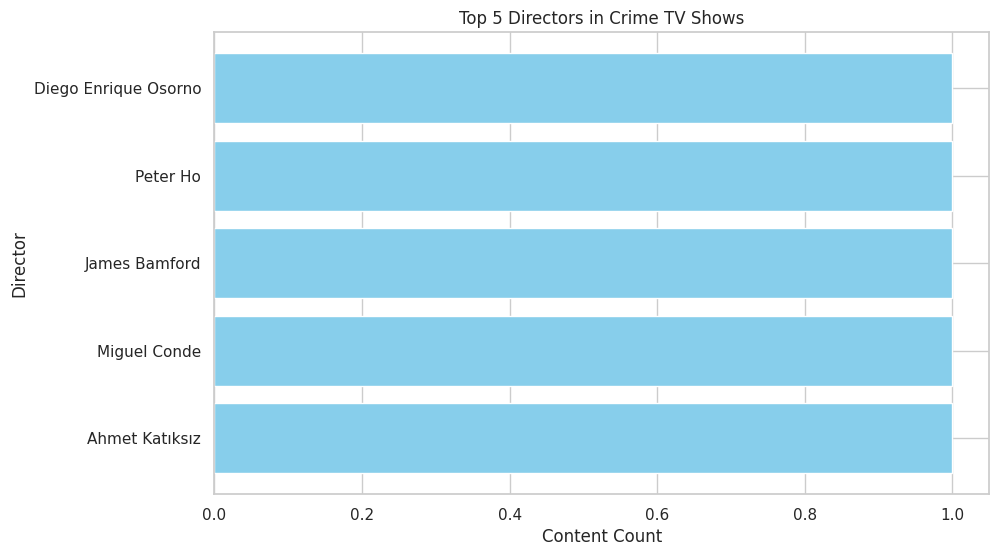

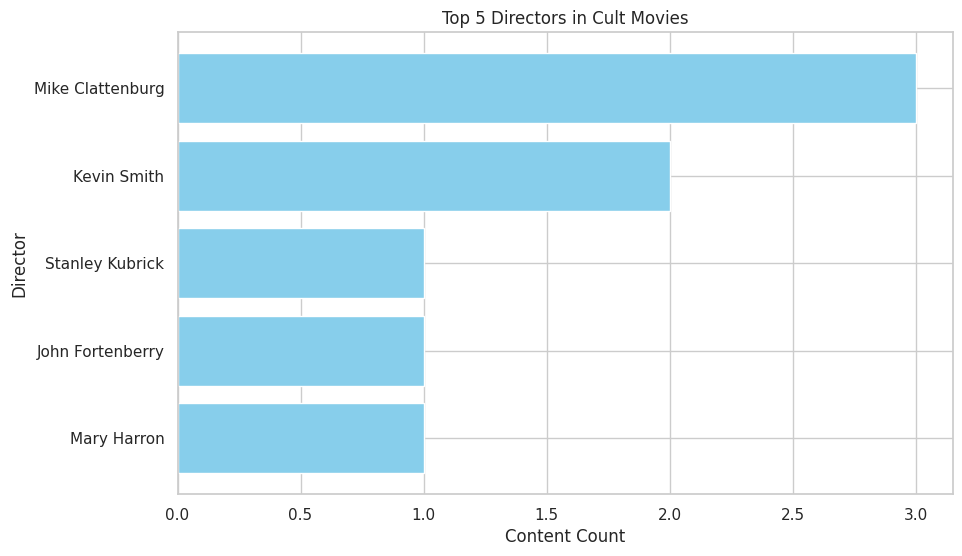

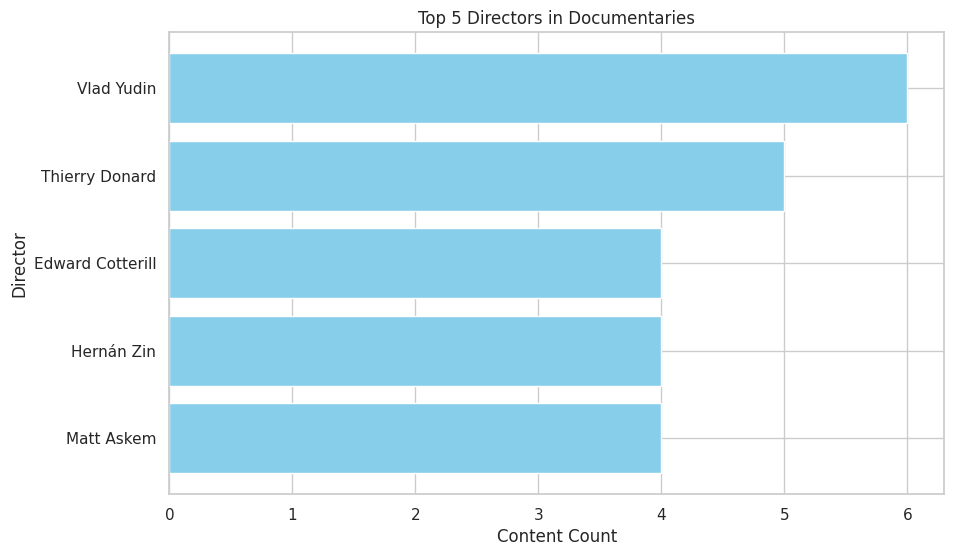

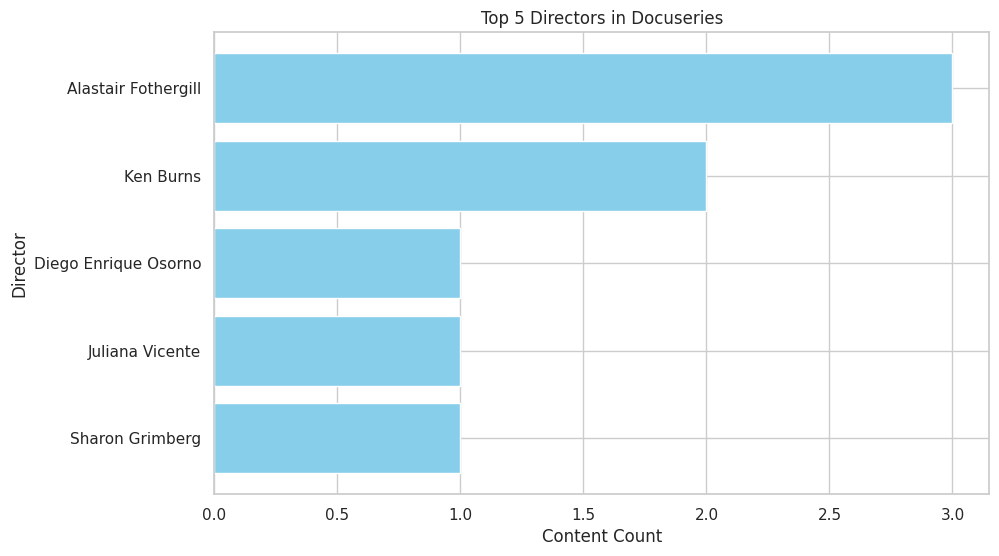

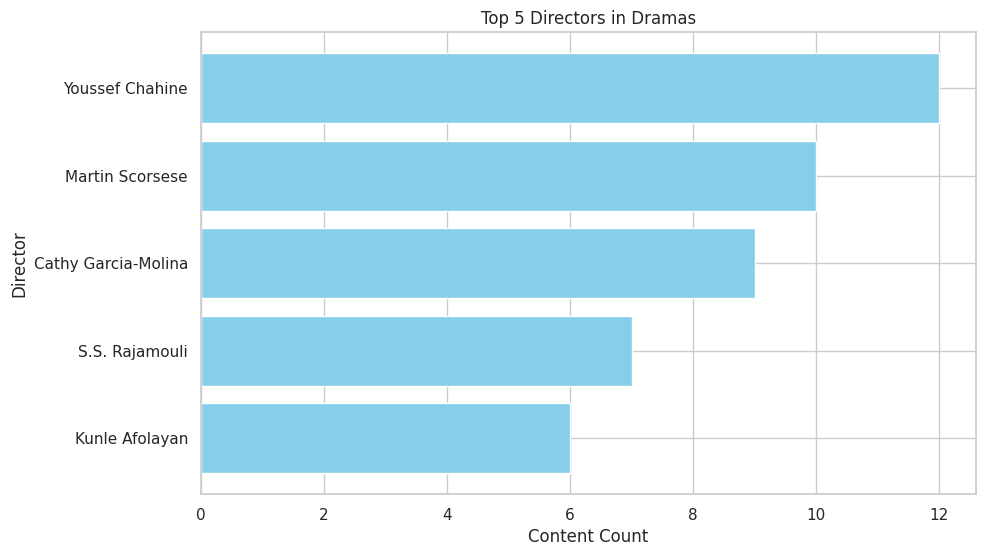

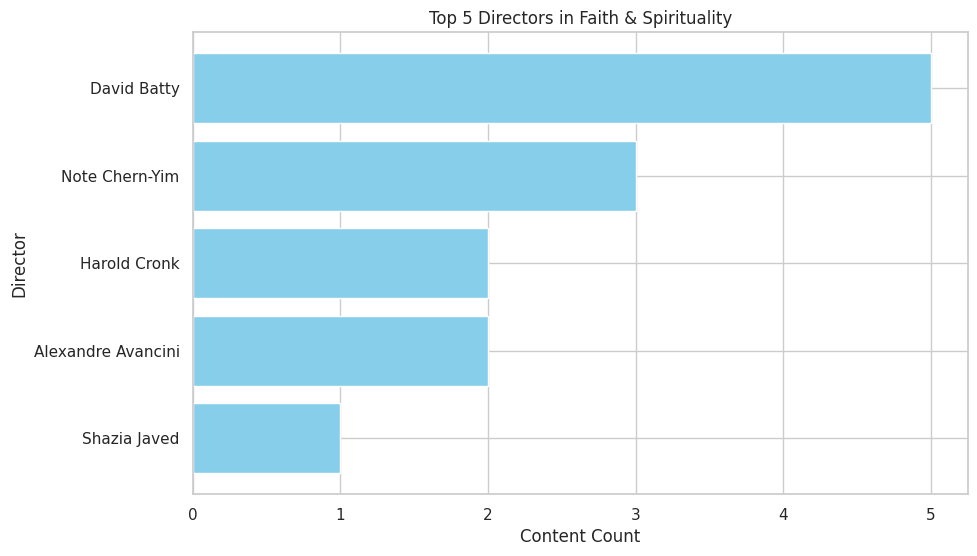

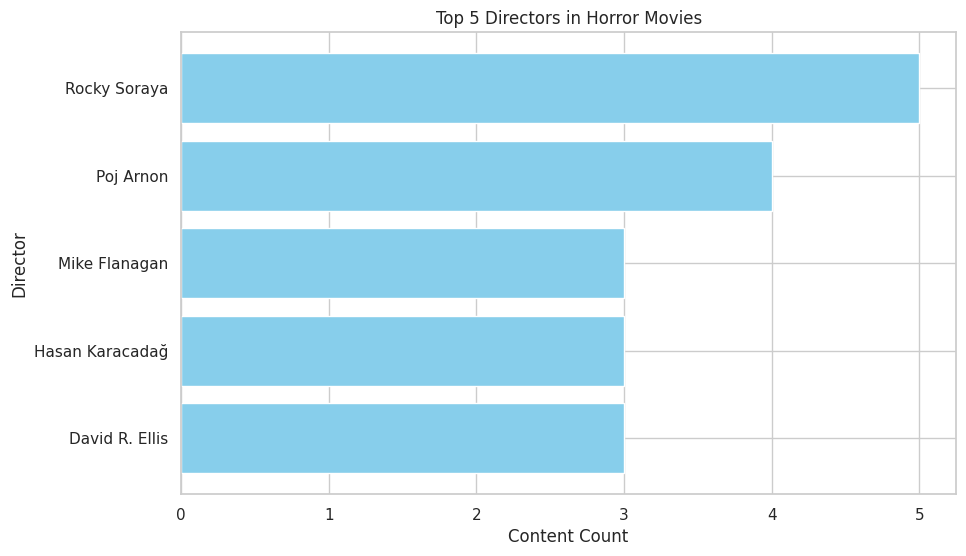

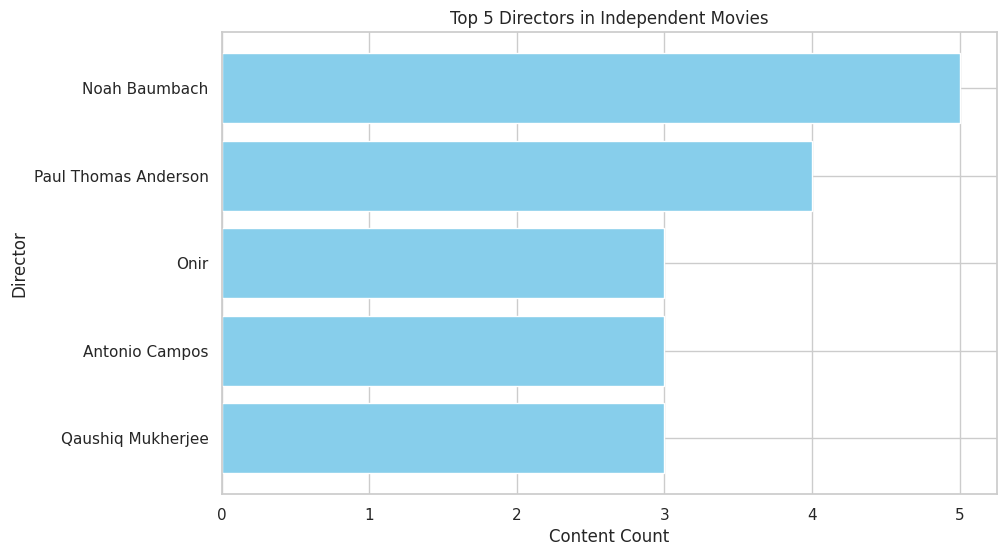

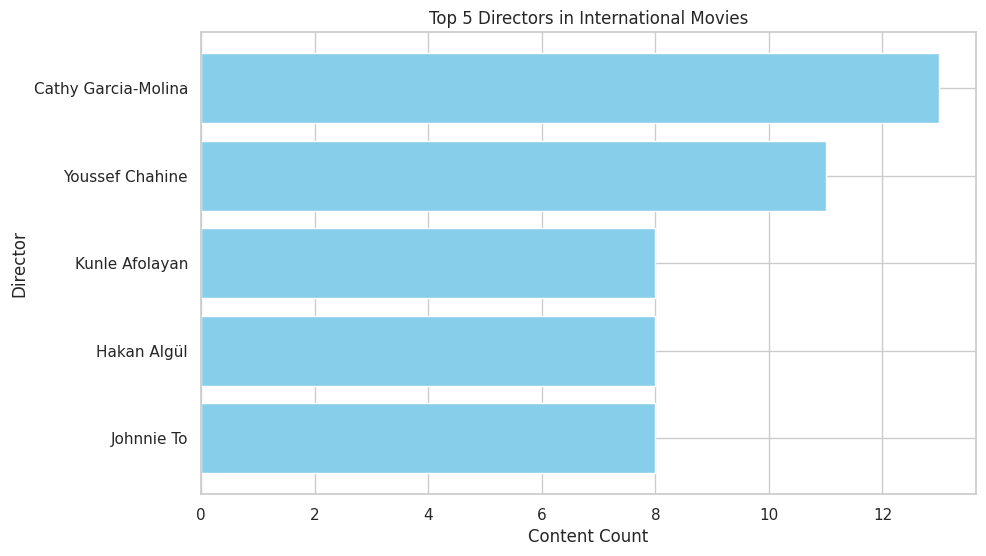

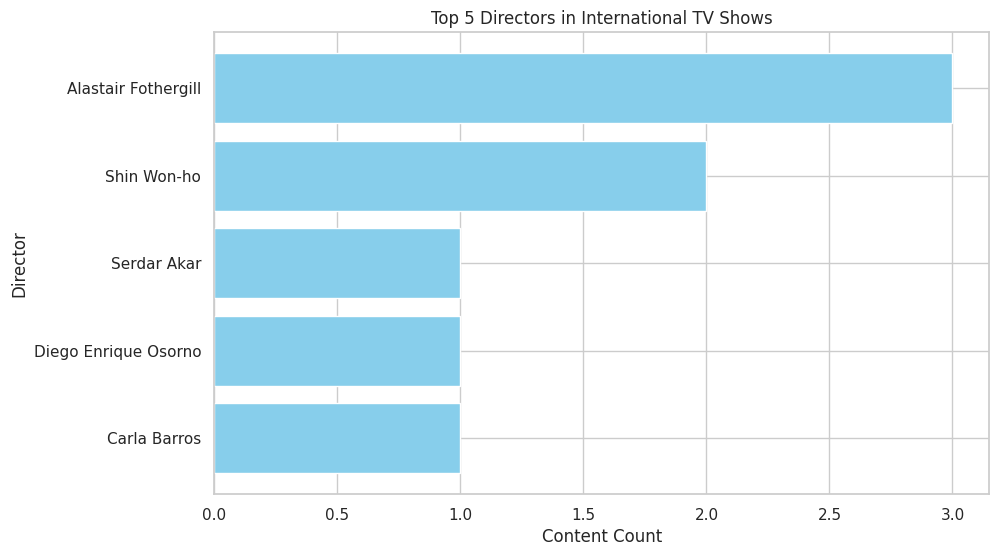

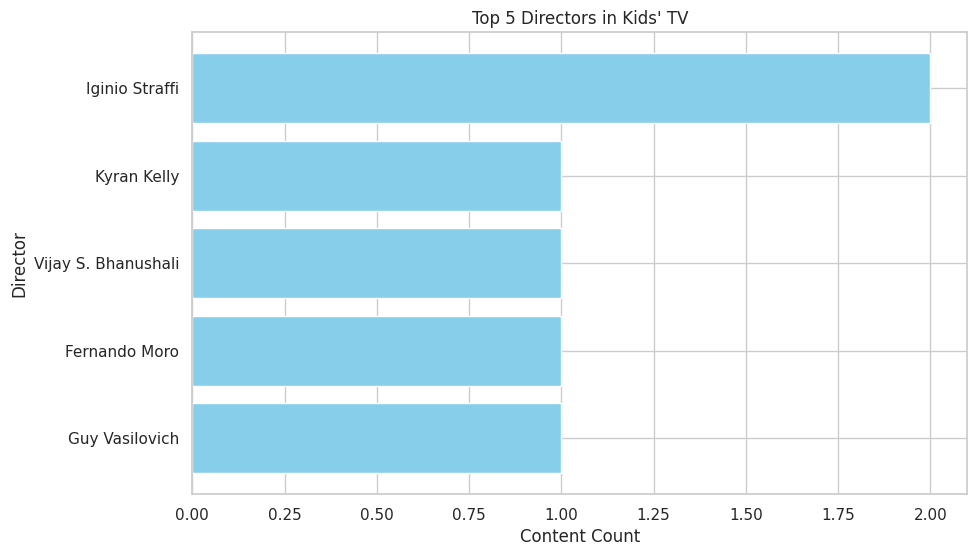

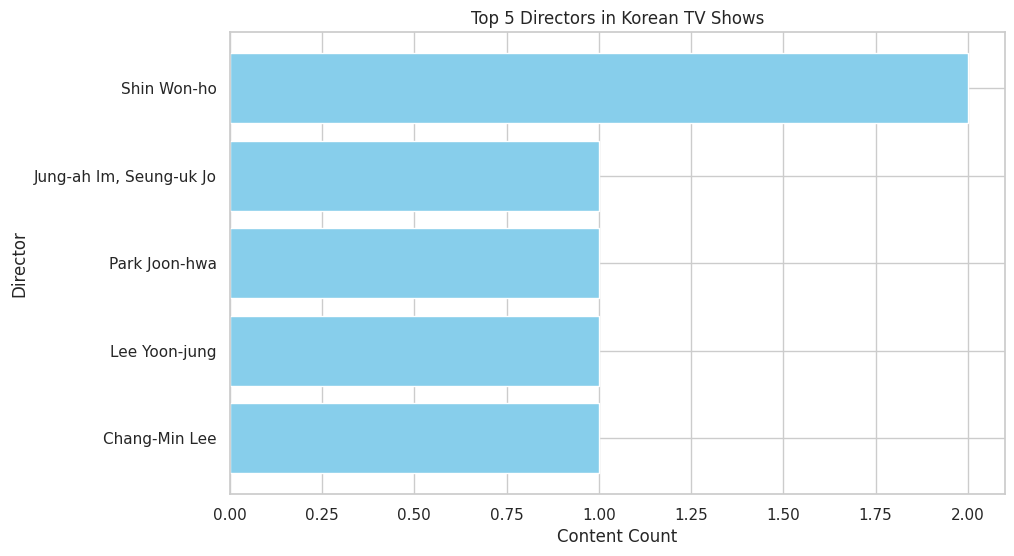

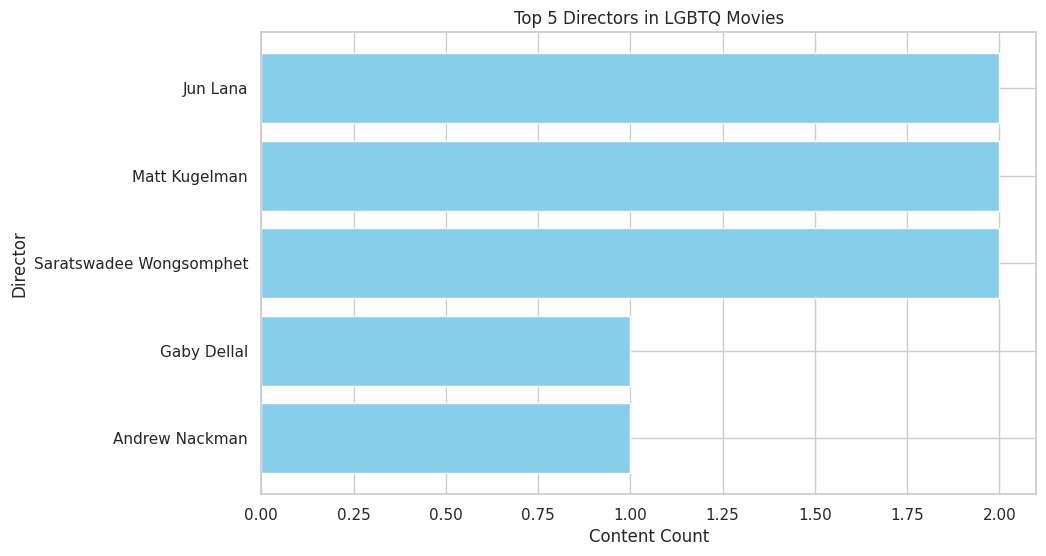

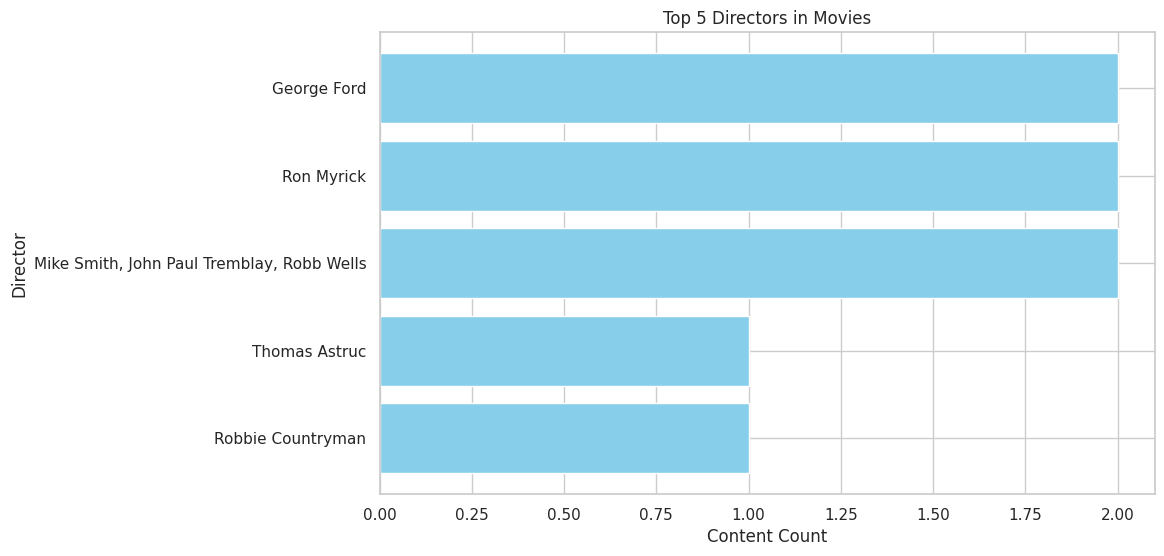

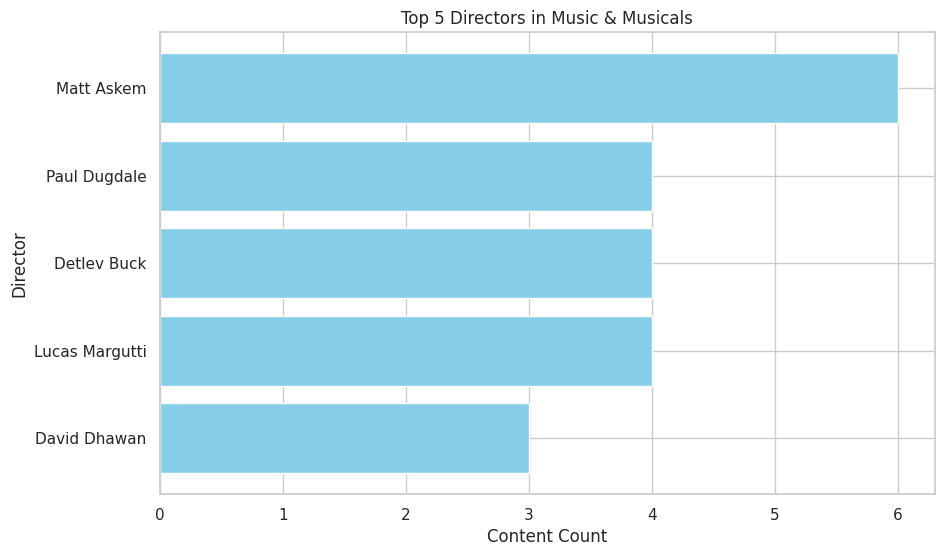

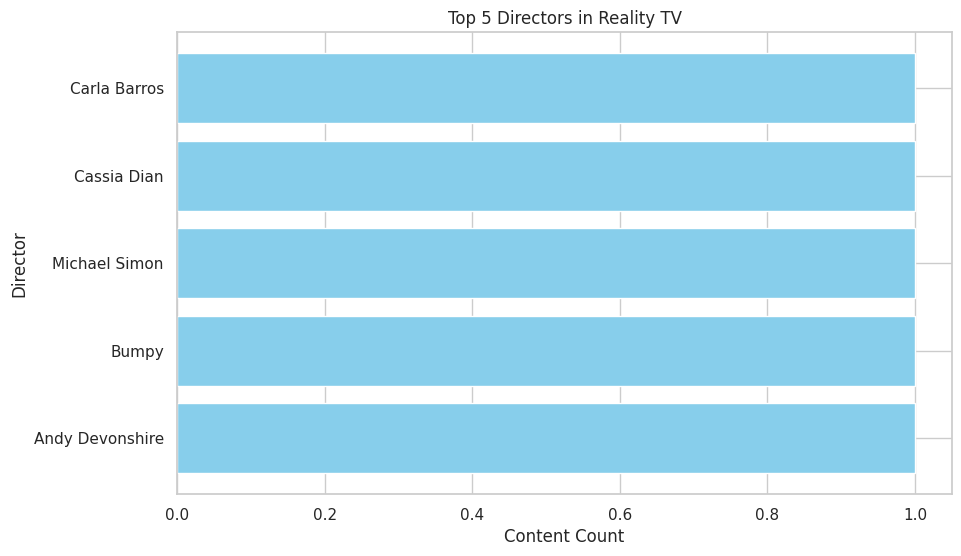

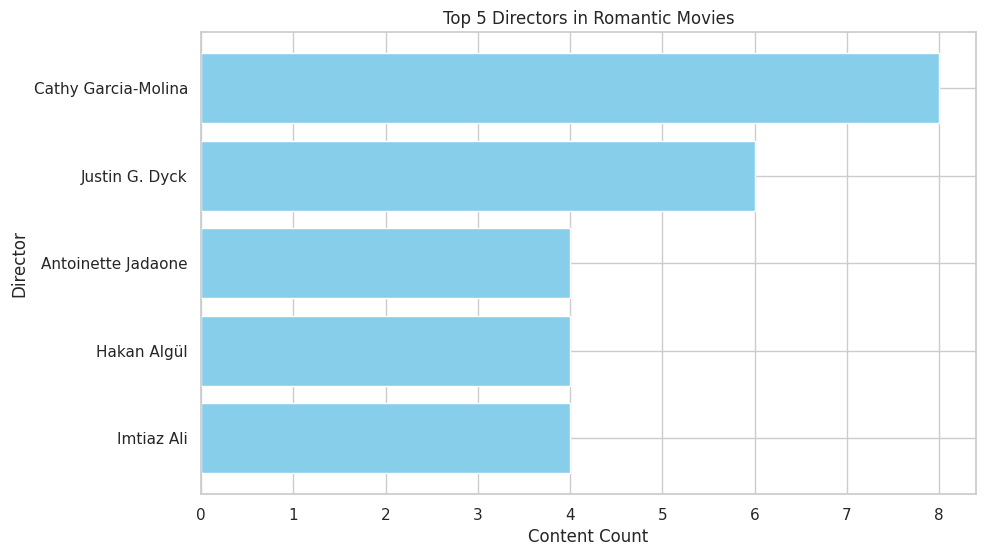

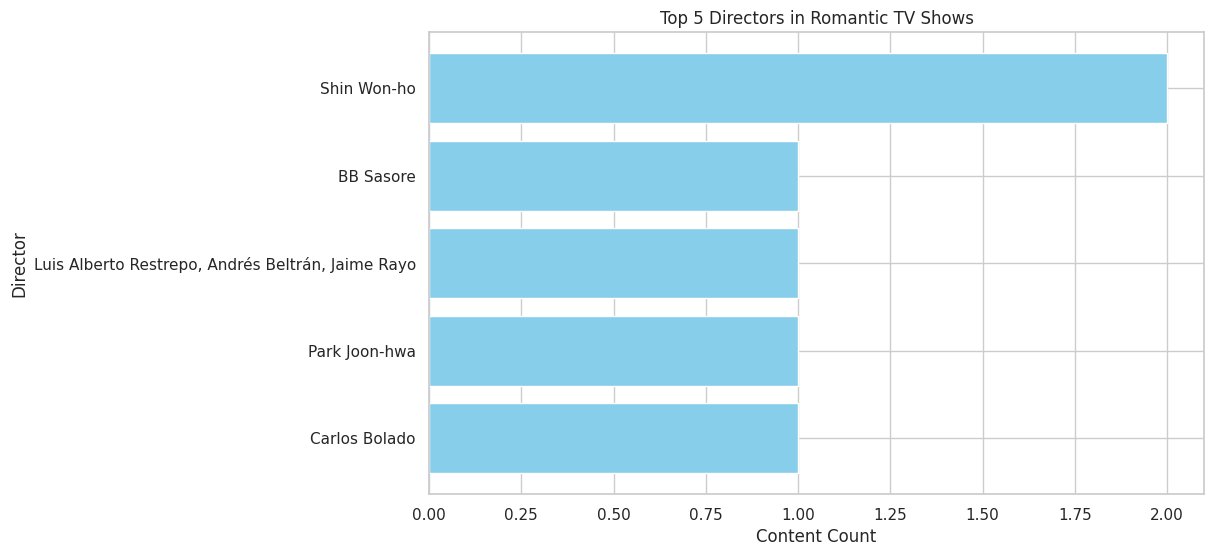

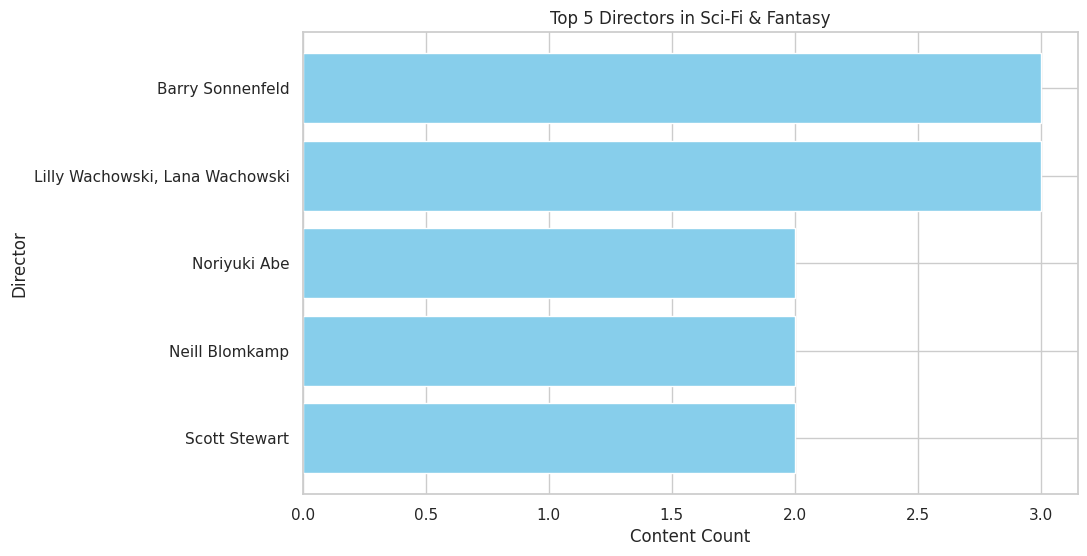

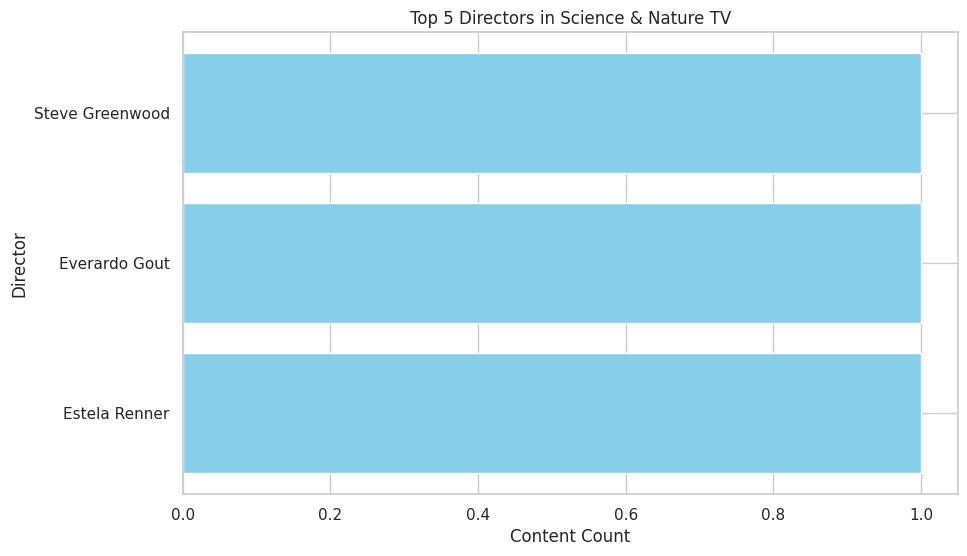

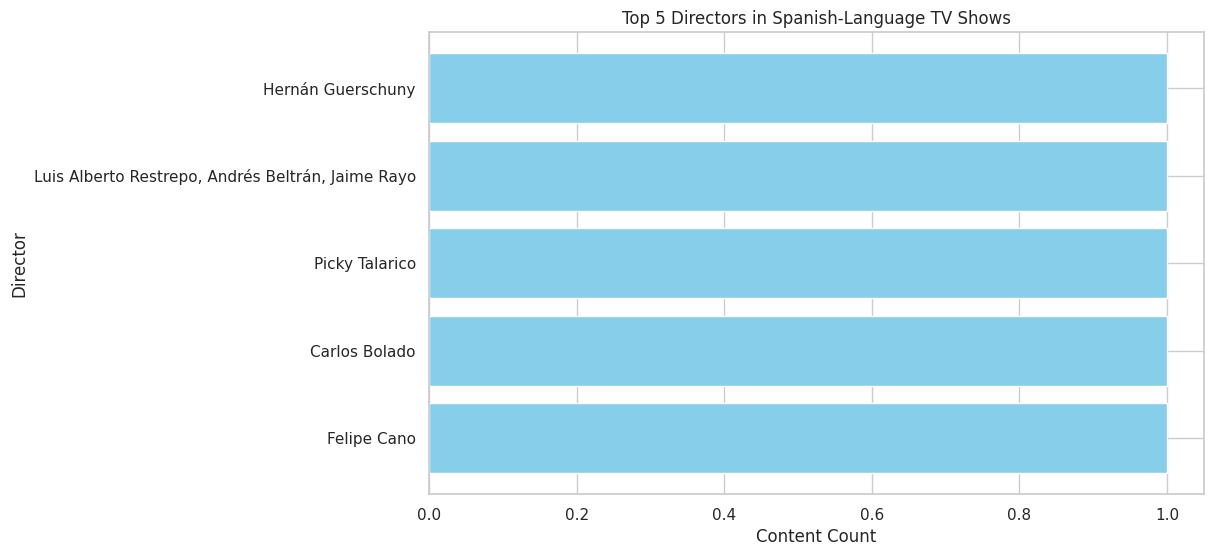

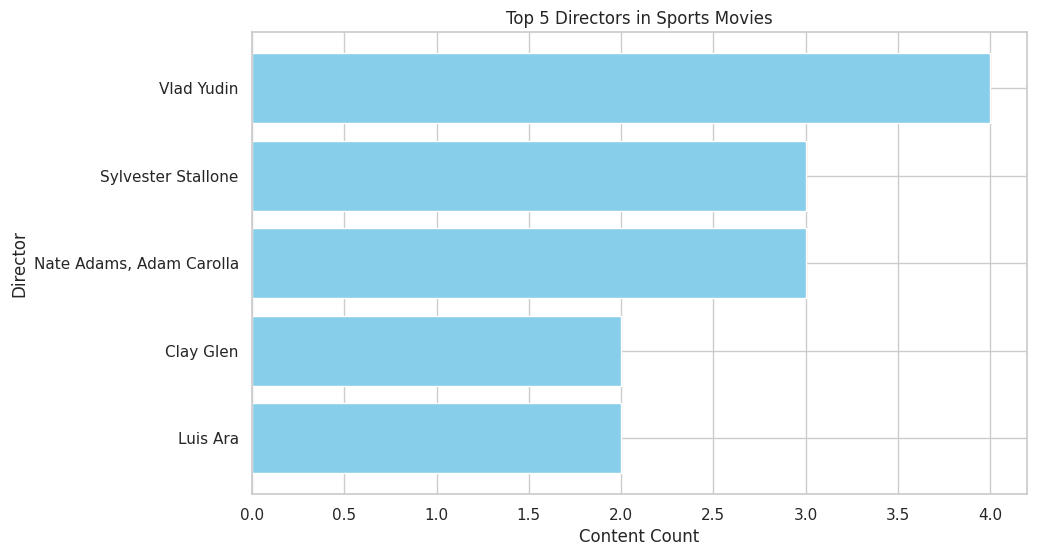

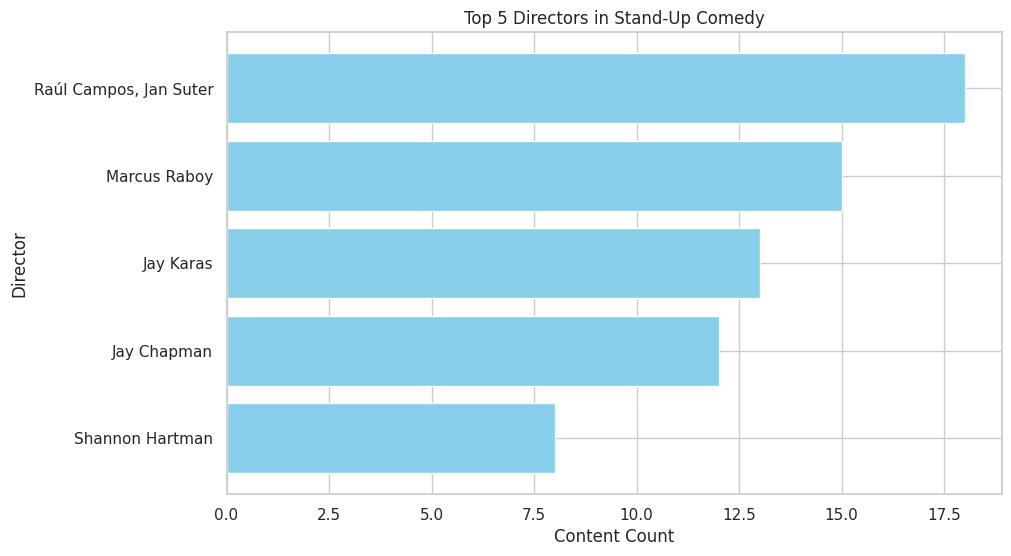

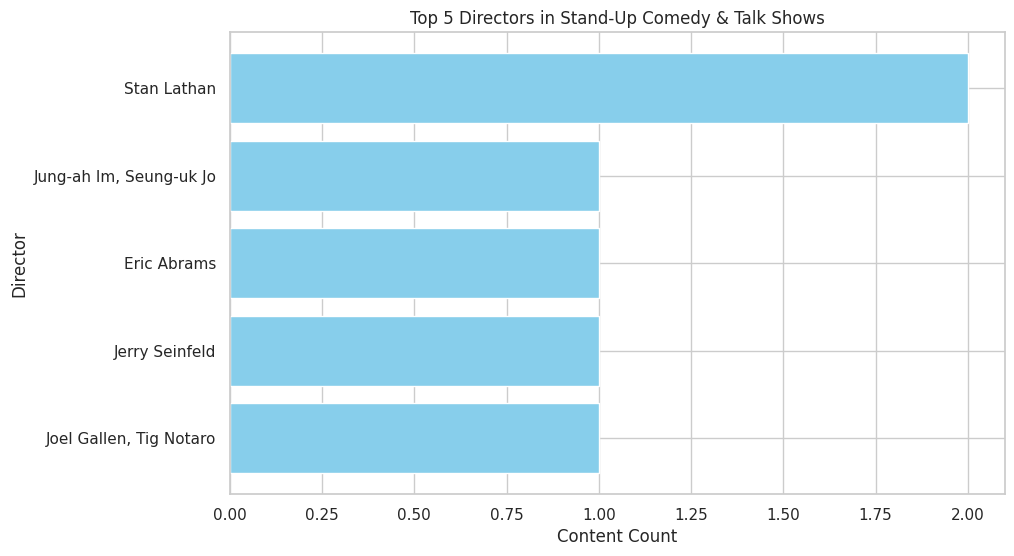

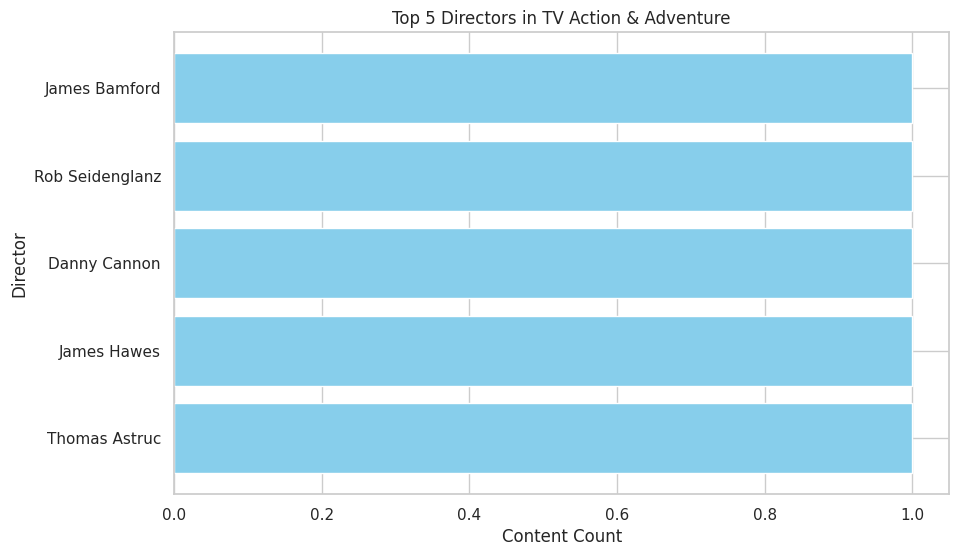

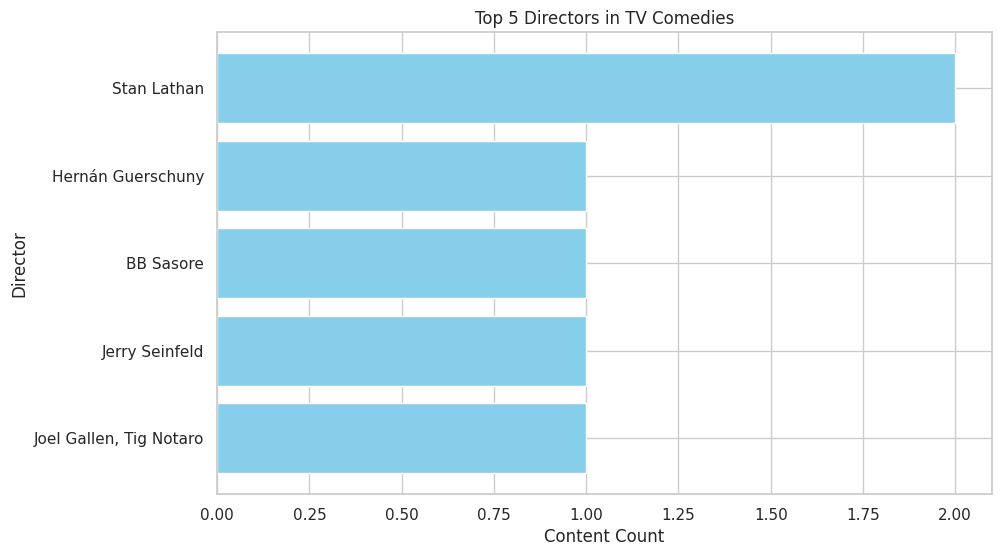

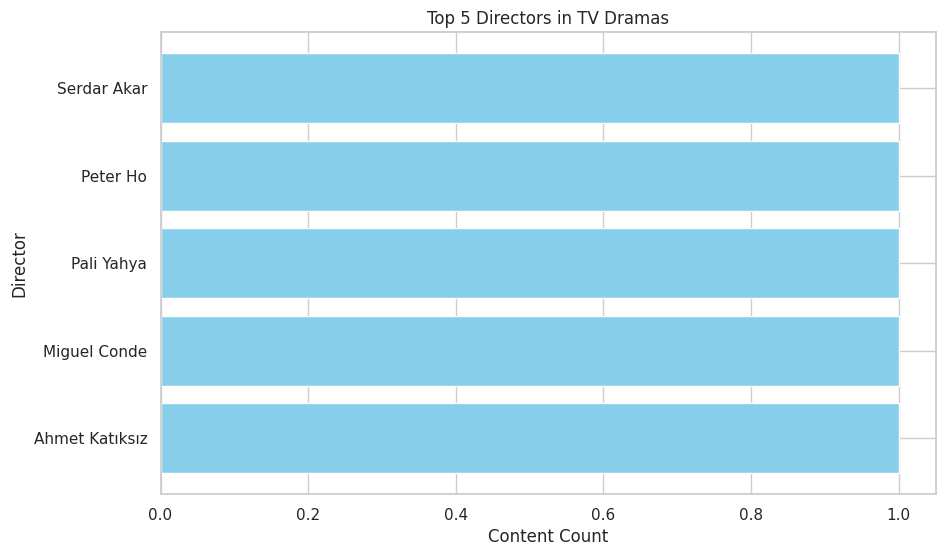

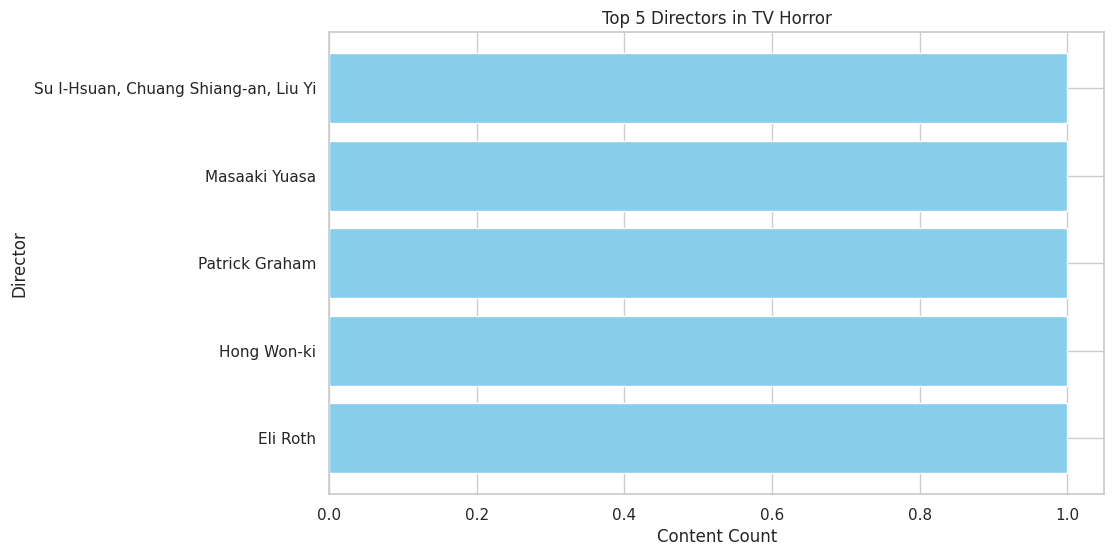

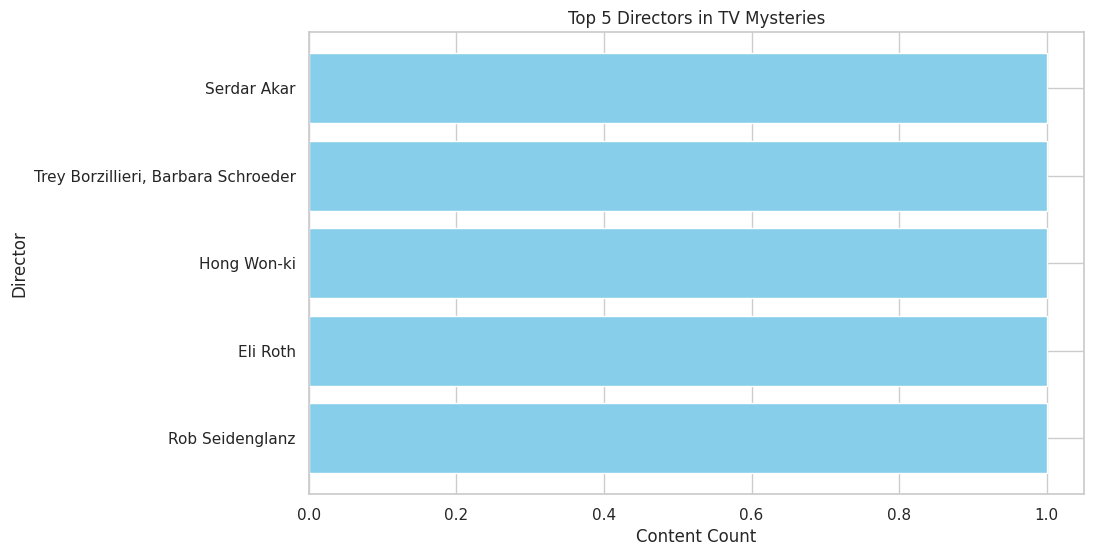

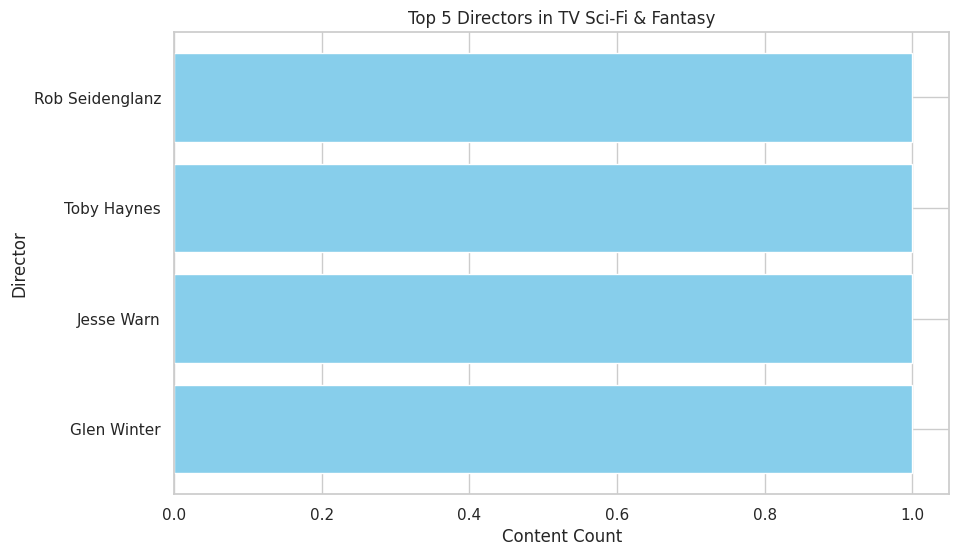

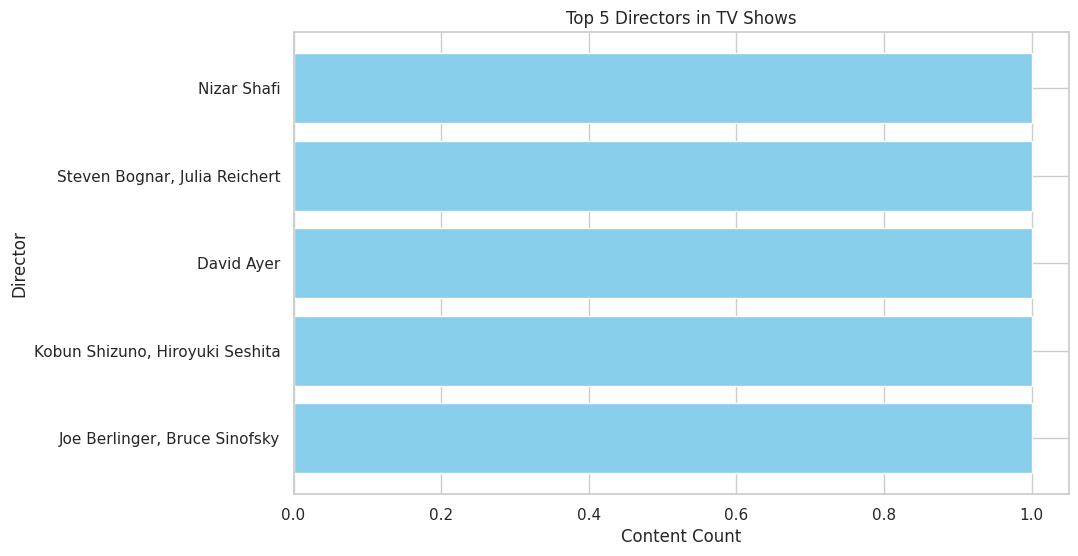

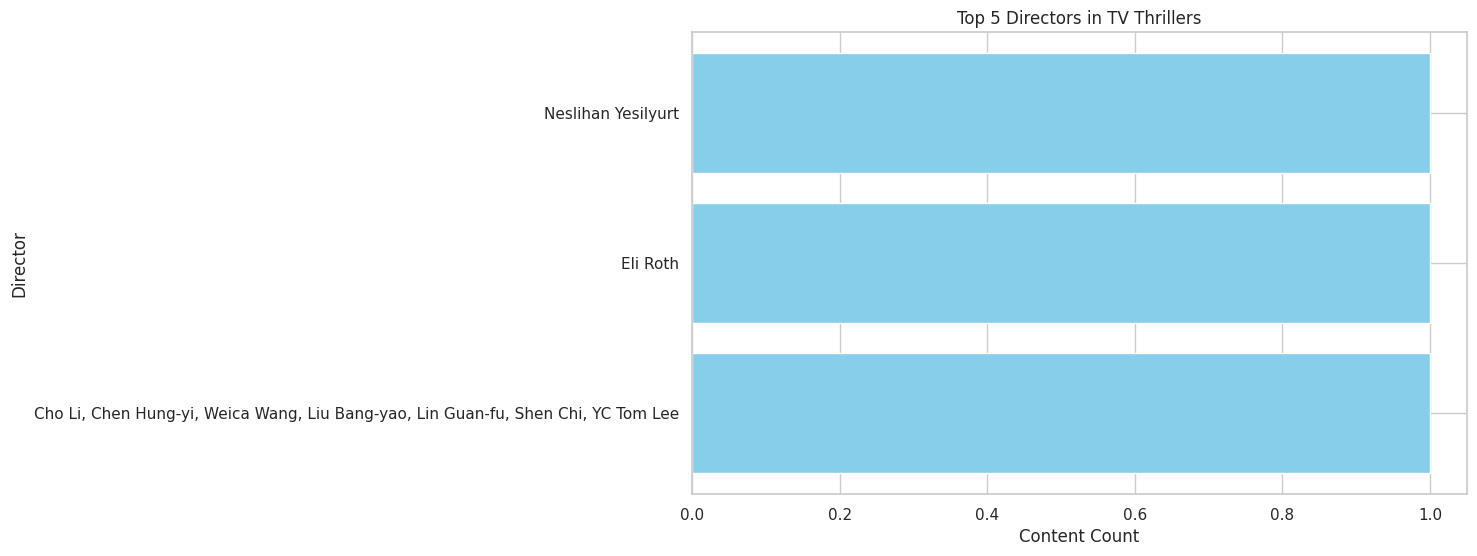

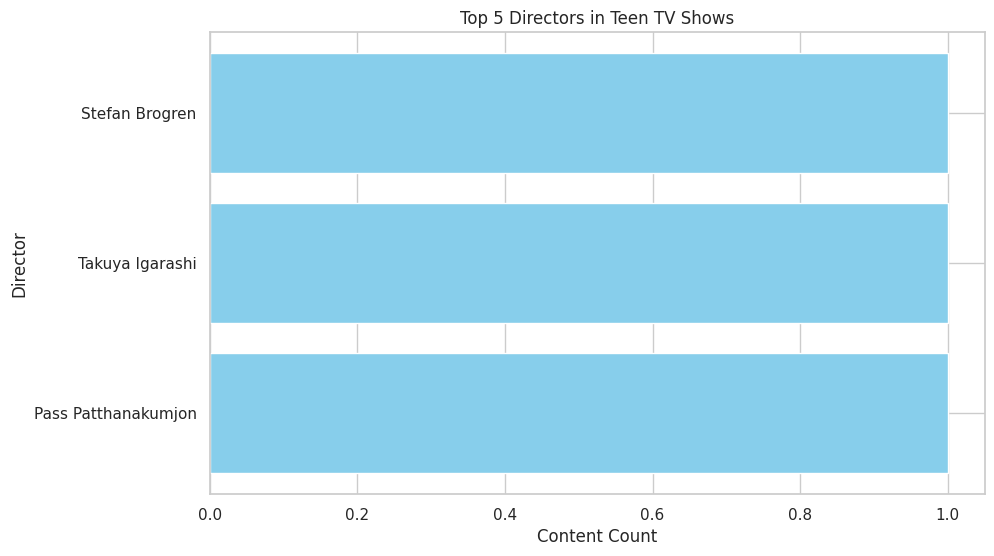

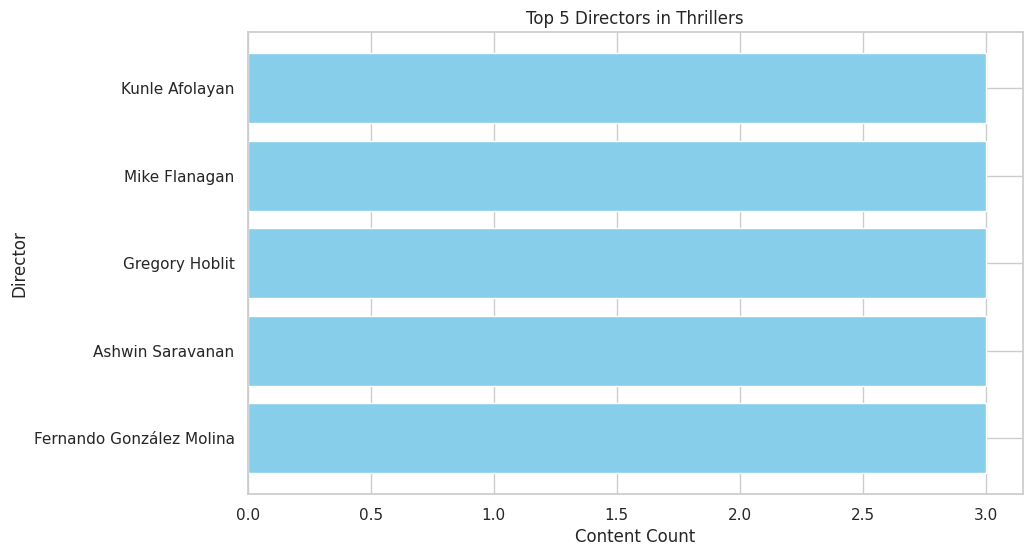

In [38]:
# Plot each genre as separate bar charts
genres = result_df['Genre'].unique()
for genre in genres:
    genre_data = result_df[result_df['Genre'] == genre]
    top_directors = genre_data.head(5)

    plt.figure(figsize=(10, 6))
    plt.barh(top_directors['Director'], top_directors['Content Count'], color='skyblue')
    plt.xlabel('Content Count')
    plt.ylabel('Director')
    plt.title(f'Top 5 Directors in {genre}')
    plt.gca().invert_yaxis()
    plt.show()

In [39]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,duration_value,genres
0,s1,TV Show,3%,NaN,"[João Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,4.0,"[International TV Shows, TV Dramas, TV Sci-Fi ..."
1,s2,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serrano,...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,93.0,"[Dramas, International Movies]"
2,s3,Movie,23:59,Gilbert Chan,"[Tedd Chan, Stella Chung, Henley Hii, Lawrence...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,78.0,"[Horror Movies, International Movies]"
3,s4,Movie,9,Shane Acker,"[Elijah Wood, John C. Reilly, Jennifer Connell...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,80.0,"[Action & Adventure, Independent Movies, Sci-F..."
4,s5,Movie,21,Robert Luketic,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,123.0,[Dramas]


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Top 5 Actor of some given Countries

In [57]:
# Chart - 13 visualization code
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.subplots as sp
# List of countries
countries = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia']

# Initialize an empty dictionary to store top actors for each country
top_actors_by_country = {}

# Iterate through each country
for country in countries:
    # Filter data for the current country
    country_data = df[df['country'] == country]

    # Explode and count the cast members
    cast_counts = country_data['cast'].explode().value_counts()

    # Get the top 5 actors for the current country
    top_actors = cast_counts.head(5)

    # Store the top actors in the dictionary
    top_actors_by_country[country] = top_actors

# Create subplots with 2 columns and 5 rows
fig = make_subplots(rows=5, cols=2, subplot_titles=countries)

# Initialize row and column counters
row_counter = 1
col_counter = 1

# Plot the top actors for each country
for country, top_actors in top_actors_by_country.items():
    trace = go.Bar(
        x=top_actors.index,
        y=top_actors.values,
        text=top_actors.values,
        textposition='auto',
        name=country
    )
    fig.add_trace(trace, row=row_counter, col=col_counter)

    # Increment row and column counters
    if col_counter < 2:
        col_counter += 1
    else:
        col_counter = 1
        row_counter += 1

# Update layout
fig.update_layout(
    title='Top 5 Actors in Each Country',
    showlegend=False,
    height=1500,
    width=1200,
)

# Show the plot
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

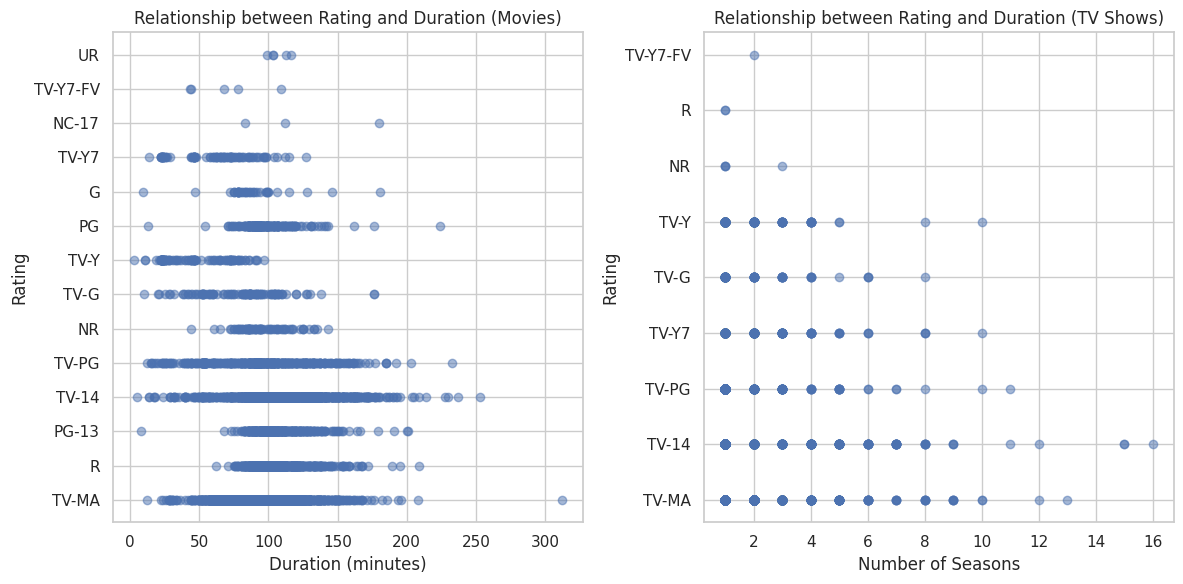

In [58]:
# Filter data for movies and TV shows
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Create scatter plots for movies and TV shows
plt.figure(figsize=(12, 6))

# Scatter plot for movies
plt.subplot(1, 2, 1)
plt.scatter(movies['duration_value'], movies['rating'], alpha=0.5)
plt.title('Relationship between Rating and Duration (Movies)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')

# Scatter plot for TV shows
plt.subplot(1, 2, 2)
plt.scatter(tv_shows['duration_value'], tv_shows['rating'], alpha=0.5)
plt.title('Relationship between Rating and Duration (TV Shows)')
plt.xlabel('Number of Seasons')
plt.ylabel('Rating')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

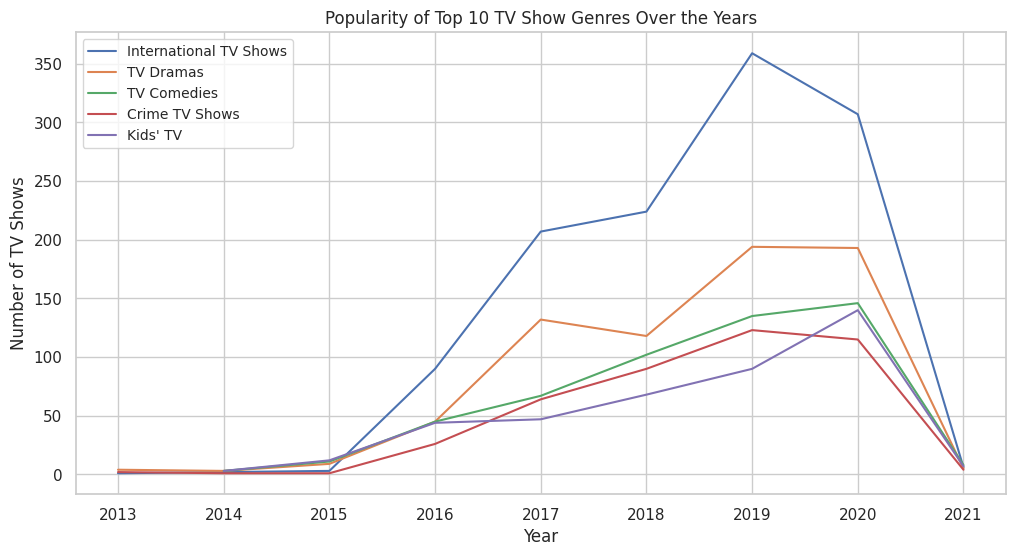

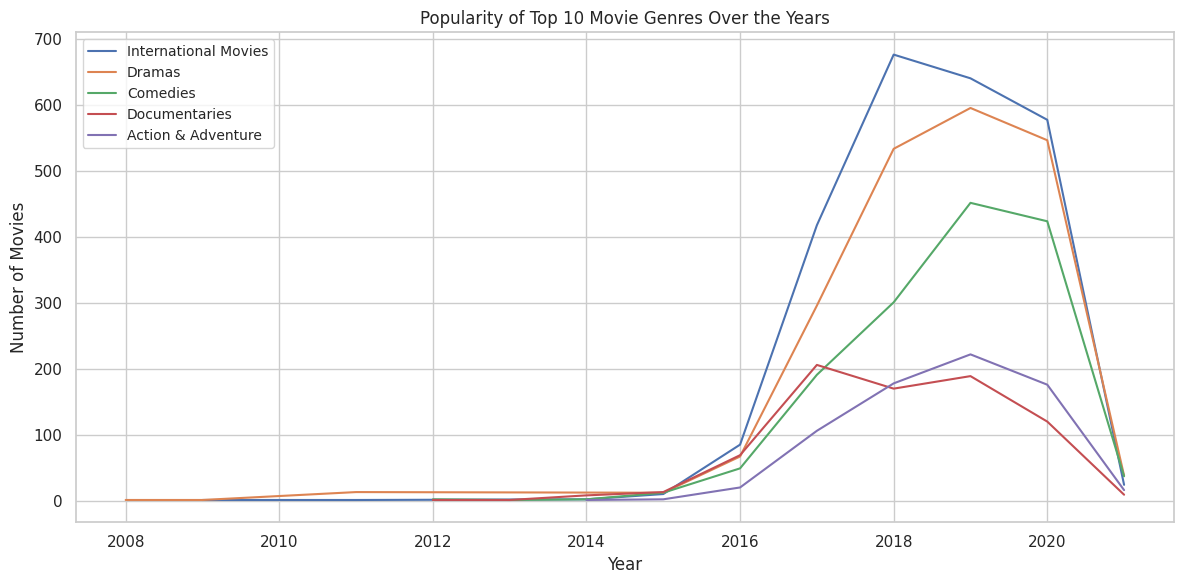

In [65]:
# Extract and count the top 10 genres for TV shows
tv_show_genres = tv_shows['listed_in'].str.split(', ').explode()
top_10_tv_show_genres = tv_show_genres.value_counts().head(5).index

# Extract and count the top 10 genres for movies
movie_genres = movies['listed_in'].str.split(', ').explode()
top_10_movie_genres = movie_genres.value_counts().head(5).index

# Create a line plot for TV shows by genre over the years
plt.figure(figsize=(12, 6))
for genre in top_10_tv_show_genres:
    genre_data = tv_shows[tv_shows['listed_in'].str.contains(genre, case=False, na=False)]
    genre_counts = genre_data.groupby('added_year')['show_id'].count()
    plt.plot(genre_counts.index, genre_counts.values, label=genre)

plt.title('Popularity of Top 10 TV Show Genres Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of TV Shows')
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)

# Create a line plot for movies by genre over the years
plt.figure(figsize=(12, 6))
for genre in top_10_movie_genres:
    genre_data = movies[movies['listed_in'].str.contains(genre, case=False, na=False)]
    genre_counts = genre_data.groupby('added_year')['show_id'].count()
    plt.plot(genre_counts.index, genre_counts.values, label=genre)

plt.title('Popularity of Top 10 Movie Genres Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [42]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [43]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [44]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [45]:
# Expand Contraction

#### 2. Lower Casing

In [46]:
# Lower Casing

#### 3. Removing Punctuations

In [47]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [48]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [49]:
# Remove Stopwords

In [50]:
# Remove White spaces

#### 6. Rephrase Text

In [51]:
# Rephrase Text

#### 7. Tokenization

In [52]:
# Tokenization

#### 8. Text Normalization

In [53]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [54]:
# POS Taging

#### 10. Text Vectorization

In [55]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [56]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [57]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [58]:
# Transform Your data

### 6. Data Scaling

In [59]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [60]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [61]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [62]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [63]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [64]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [65]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [66]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [67]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [68]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [69]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [70]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [71]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [72]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***